# IMPORTING REQUIRED LIBRARIES

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
plt.style.use('bmh')
import datetime as dt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
odf=pd.read_csv(r"C:\Users\ASUS\Desktop\河海大学\课程任务\大数据与商务智能\historic_demand_year_2018-2023.csv" )


In [4]:
odf.head()

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0        1-Jan-18                  1  25593  26501                 23307   
1        1-Jan-18                  2  26349  27207                 24010   
2        1-Jan-18                  3  26240  27480                 23826   
3        1-Jan-18                  4  25292  26760                 22944   
4        1-Jan-18                  5  24416  26162                 22147   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      3064                    5754   
1                      3005                    5754   
2                      2950                    5754   
3                      2895                    5754   
4                      2892                    5754   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  \
0                          0                    12916            0   
1                          0                    12916            0   
2                          0                    12916            0   
3                          0                    12916            0   
4                          0                    12916            0   

   PUMP_STORAGE_PUMPING  IFA_FLOW  IFA2_FLOW  BRITNED_FLOW  MOYLE_FLOW  \
0                   308      1415          0           715         205   
1                   258      1404          0           709         201   
2                   640      1405          0           720         211   
3                   868      1405          0           727         211   
4                  1146      1308          0           678         211   

   EAST_WEST_FLOW  NEMO_FLOW  
0             432          0  
1             432          0  
2             432          0  
3             432          0  
4             432          0

In [5]:
new_columns_name=['nd','tsd','ewd','em_wind_gen','em_wind_cap',
'em_solar_gen','em_solar_cap','non_balacing_mech_stor','pump_storage_pumping']
odf.isna().sum()

SETTLEMENT_DATE              0
SETTLEMENT_PERIOD            0
ND                           0
TSD                          0
ENGLAND_WALES_DEMAND         0
EMBEDDED_WIND_GENERATION     0
EMBEDDED_WIND_CAPACITY       0
EMBEDDED_SOLAR_GENERATION    0
EMBEDDED_SOLAR_CAPACITY      0
NON_BM_STOR                  0
PUMP_STORAGE_PUMPING         0
IFA_FLOW                     0
IFA2_FLOW                    0
BRITNED_FLOW                 0
MOYLE_FLOW                   0
EAST_WEST_FLOW               0
NEMO_FLOW                    0
dtype: int64

In [6]:
odf.columns

Index(['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW',
       'NEMO_FLOW'],
      dtype='object')

In [7]:
odf['SETTLEMENT_DATE'] = pd.to_datetime(odf['SETTLEMENT_DATE'])
# 定义新的列名
new_columns_name = ['nd', 'tsd', 'ewd', 'em_wind_gen', 'em_wind_cap',
                   'em_solar_gen', 'em_solar_cap', 'non_balacing_mech_stor', 'pump_storage_pumping']
# 按SETTLEMENT_DATE分组并计算指定列的平均值
df = odf.groupby(['SETTLEMENT_DATE'])['ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING'].mean()

# 更新列名为新的列名
df.columns = new_columns_name

# 将DataFrame的频率更改为每天
df = df.asfreq('D')

# 显示DataFrame的前五行
print(df.head())

                           nd           tsd           ewd  em_wind_gen  \
SETTLEMENT_DATE                                                          
2018-01-01       29072.041667  30282.333333  26426.250000  2393.604167   
2018-01-02       34863.416667  36009.041667  32155.645833  2398.333333   
2018-01-03       34499.708333  35690.979167  31515.562500  3666.583333   
2018-01-04       36414.145833  37628.979167  32892.625000  1954.979167   
2018-01-05       36975.916667  38260.333333  33564.145833  1288.437500   

                 em_wind_cap  em_solar_gen  em_solar_cap  \
SETTLEMENT_DATE                                            
2018-01-01            5754.0    341.958333       12916.0   
2018-01-02            5754.0     67.625000       12916.0   
2018-01-03            5754.0    423.062500       12916.0   
2018-01-04            5754.0    203.729167       12916.0   
2018-01-05            5754.0    376.104167       12916.0   

                 non_balacing_mech_stor  pump_storage_pumpin

In [8]:
df=df['2018-01-01':][['nd','tsd','ewd']]
df

nd           tsd           ewd
SETTLEMENT_DATE                                          
2018-01-01       29072.041667  30282.333333  26426.250000
2018-01-02       34863.416667  36009.041667  32155.645833
2018-01-03       34499.708333  35690.979167  31515.562500
2018-01-04       36414.145833  37628.979167  32892.625000
2018-01-05       36975.916667  38260.333333  33564.145833
...                       ...           ...           ...
2023-12-27       25385.958333  28008.187500  23668.916667
2023-12-28       25081.229167  27992.687500  23355.562500
2023-12-29       26254.895833  28972.166667  23774.916667
2023-12-30       26518.437500  27871.000000  24143.500000
2023-12-31       25700.729167  27455.937500  23172.854167

[2191 rows x 3 columns]

In [9]:
des=df.describe().T.reset_index()
des

index   count          mean          std           min           25%  \
0    nd  2191.0  27963.012437  4474.678538  17560.187500  24523.687500   
1   tsd  2191.0  29593.810619  4397.554356  19465.666667  26388.895833   
2   ewd  2191.0  25558.793860  4115.892727  16450.625000  22402.637917   

            50%           75%           max  
0  27555.895833  31206.479167  40297.229167  
1  29088.354167  32642.281250  42152.291667  
2  25120.229167  28639.625000  37573.791667

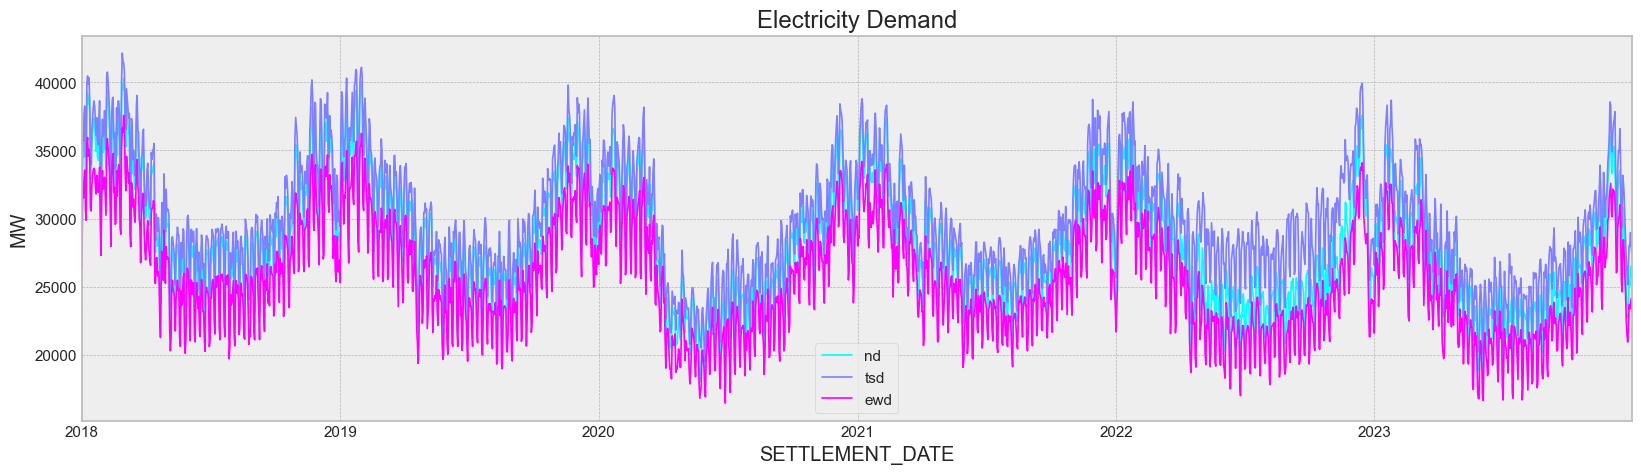

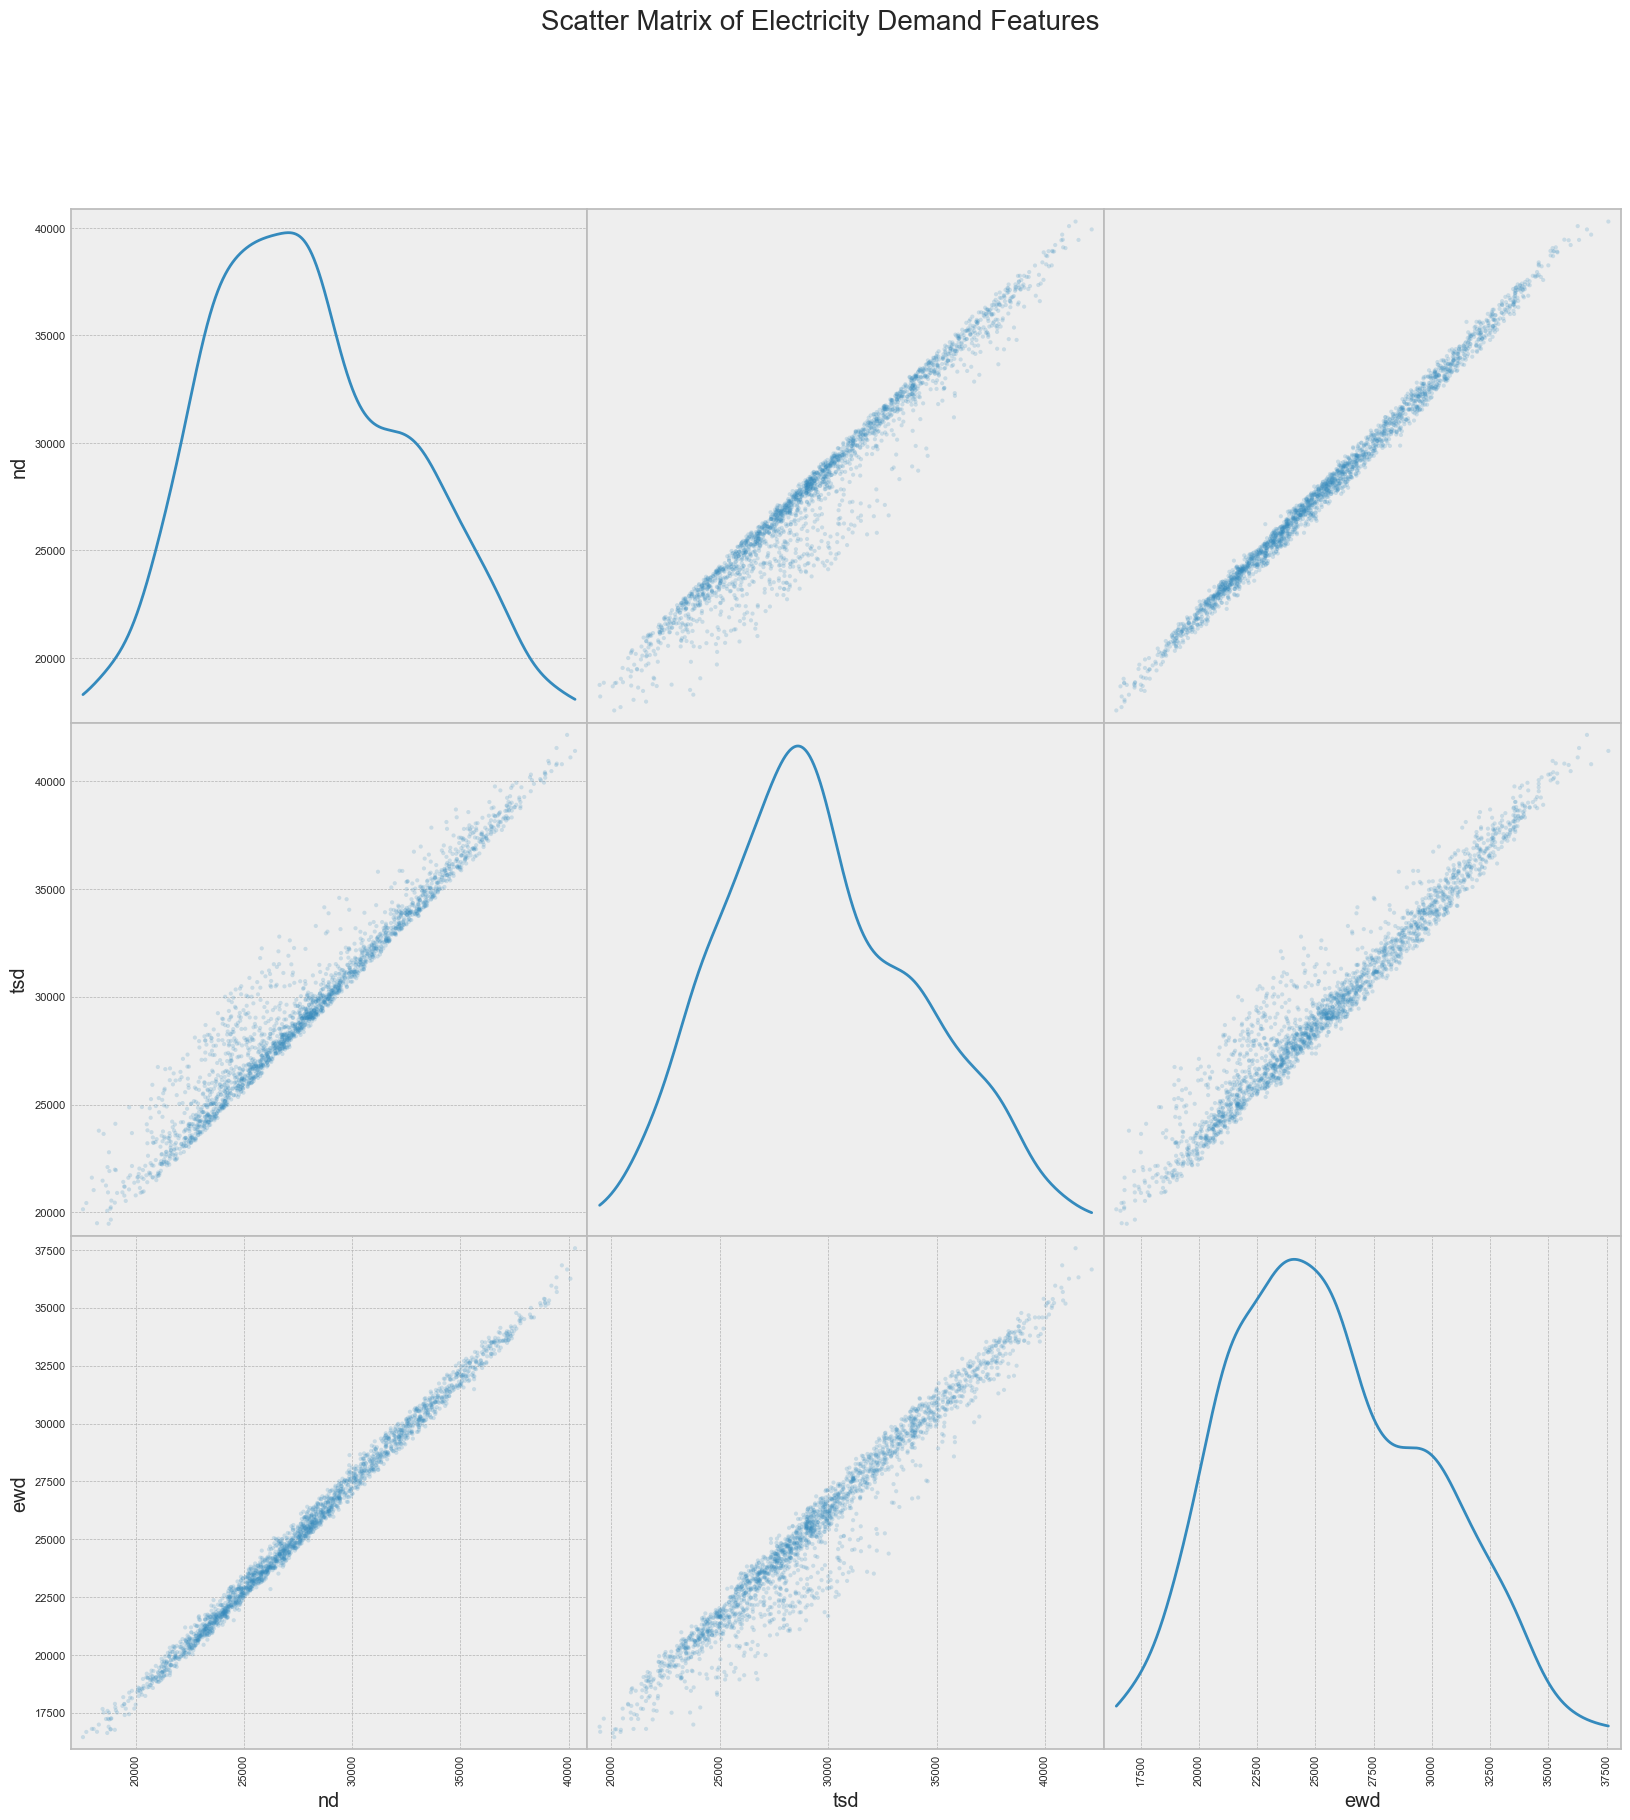

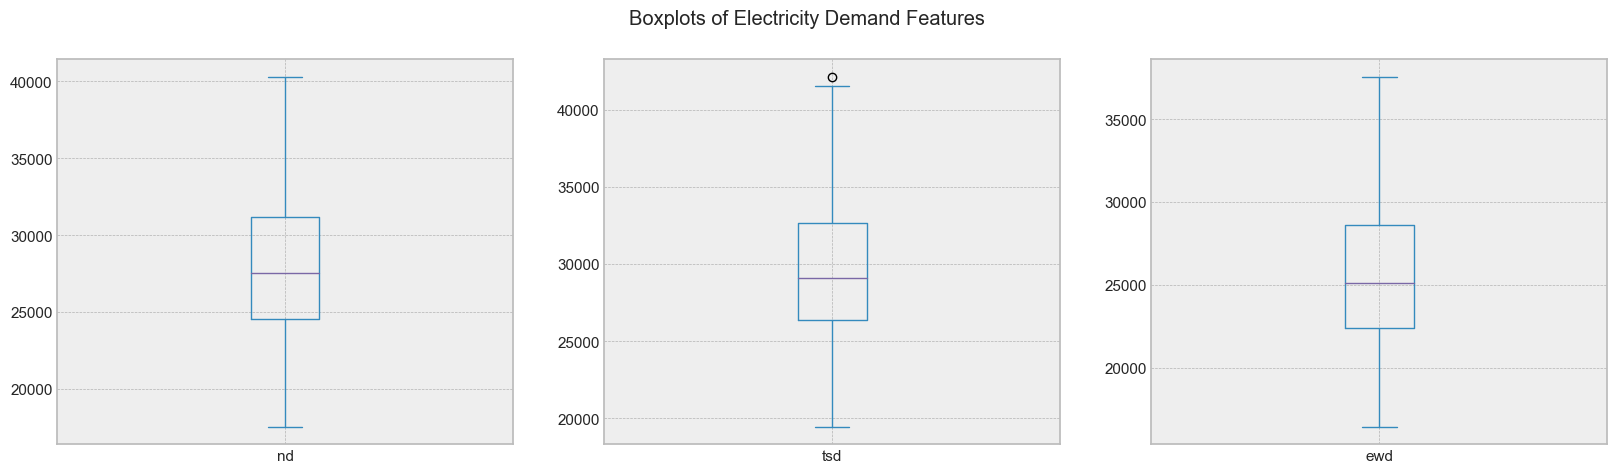

In [10]:
df.plot(figsize=(20,5),linewidth=1.2,cmap='cool',ylabel='MW',title='Electricity Demand')


# Plot scatter matrix to see relationships between features
pd.plotting.scatter_matrix(df, figsize=(20, 20), diagonal='kde', alpha=0.2)
plt.suptitle('Scatter Matrix of Electricity Demand Features', fontsize=20)
plt.show()

# Plot boxplots for each feature
df.plot(kind='box', subplots=True, layout=(1, 3), figsize=(20, 5), title='Boxplots of Electricity Demand Features')
plt.show()

# DATA PREPROCESSING

In [11]:

import tensorflow as tf
import keras
from tensorflow.keras.layers import Lambda, Dense, LSTM, SimpleRNN, Dropout,GRU,Bidirectional,LeakyReLU,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam,Adagrad
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping,ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from tensorflow.keras.models import load_model



 @ Peprocessing steps:
    
    1) Extract the values in the dataframe in separate variables and reshape into a proper dimensions.
    2) Using the scaler transformation for conversition.
    3) Create a function which should intake the data and time steps for forecasting the time series sequences.

In [12]:
nd_data=df['nd'].values.reshape(-1,1)
tsd_data=df['tsd'].values.reshape(-1,1)
ewd_data=df['ewd'].values.reshape(-1,1)
print(nd_data.shape,tsd_data.shape,ewd_data.shape)

(2191, 1) (2191, 1) (2191, 1)


In [13]:

nd_sca=mms()
tsd_sca=mms()
ewd_sca=mms()

nd_scaler_ = nd_sca.fit_transform(nd_data)
tsd_scaler_ = tsd_sca.fit_transform(tsd_data)
ewd_scaler_ = ewd_sca.fit_transform(ewd_data)


In [14]:

def dataset(data,time_steps):
    x,y=[],[]
    for i in range(len(data)-time_steps):
        x.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(x),np.array(y)

time_steps=12

In [15]:
x_nd,y_nd=dataset(nd_scaler_ ,time_steps)
x_tsd,y_tsd=dataset(tsd_scaler_,time_steps)
x_ewd,y_ewd=dataset(ewd_scaler_,time_steps)
x_ewd.shape,y_ewd.shape

((2179, 12, 1), (2179, 1))

Here we more dependent on the temporal sequences for the next prediction of the values. So, that we should not shuffle the data at any cost.

In [16]:
xtrain_nd,xtest_nd,ytrain_nd,ytest_nd=tts(x_nd,y_nd,test_size=0.2,shuffle=False)
xtrain_tsd,xtest_tsd,ytrain_tsd,ytest_tsd=tts(x_tsd,y_tsd,test_size=0.2,shuffle=False)
xtrain_ewd,xtest_ewd,ytrain_ewd,ytest_ewd=tts(x_ewd,y_ewd,test_size=0.2,shuffle=False,)

In [17]:
xtrain_nd.shape

(1743, 12, 1)

Our main features are National Demand, Transition System Demand and England and wales demand of Electricity and so our features are 3.And using that create a single model with 3 output features for forecasting the year 2024.

In [18]:
num_features=3
xtrain_combined = np.concatenate((xtrain_nd, xtrain_tsd, xtrain_ewd), axis=2)
xtest_combined = np.concatenate((xtest_nd, xtest_tsd, xtest_ewd), axis=2)
xtest_combined.shape

(436, 12, 3)

Using the below function which will helps us to know about the ideal learning rate of the neural network model for faster convergence than naive learning rate.

In [19]:
def lr_(model,epoch):

    lr_sched=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-9 * 10**(epoch/20))
    
    opt=tf.keras.optimizers.Adam()
    opt1=tf.keras.optimizers.SGD(momentum=0.9)
    opt2=tf.keras.optimizers.Adagrad()
    
    model.compile(optimizer=opt,loss=tf.keras.losses.Huber())
    
    history=model.fit(xtrain_combined,y=[ytrain_nd,ytrain_tsd,ytrain_ewd],shuffle=False,use_multiprocessing=True,
            batch_size=1,  epochs=epoch,callbacks=[lr_sched],steps_per_epoch=200)

    plt.figure(figsize=(20,6))
    plt.semilogx(history.history['lr'],history.history['loss'],linewidth=3,color='violet')
    plt.title('Optimal Learning Rate plot')
    plt.show()
    

In [20]:
def model_fits(model,model_name,_lr_rate,epoch):

    """
    OPTIMIZERS:
    
    * opt------> Adam
    * opt1-----> Stochastic Gradinet Descent
    * opt2-----> Adgrad
    * opt3-----> RMSprop
    
    """
    
    """
    CALLBACKS FOR BETTER MODEL BASED ON METRICS
    
    * e_s ----> Early Stopping
    * mc -----> Model Checkpoint
    
    """
    opt=tf.keras.optimizers.Adam(learning_rate=_lr_rate,epsilon=1e-4)
    opt1=tf.keras.optimizers.SGD(momentum=0.9,learning_rate=_lr_rate)
    opt2=tf.keras.optimizers.Adagrad(learning_rate=_lr_rate,epsilon=1e-4)
    opt3=tf.keras.optimizers.RMSprop( learning_rate=_lr_rate,rho=0.9,momentum=0.990,epsilon=1e-04,centered=True,)

    e_s = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=7, verbose=1,
                                         restore_best_weights=True, min_delta=0.0001)
    
    f="C:/Users/Sethu/Downloads/save besgt/savebestonlymodel.h5"
        
    mc=tf.keras.callbacks.ModelCheckpoint(filepath=f,monitor='mae',verbose=1,save_best_only=True)
   
    model.compile(optimizer=opt,loss=tf.keras.losses.Huber(),metrics=['mse','mae'])
    
    history=model.fit(xtrain_combined,y=[ytrain_nd,ytrain_tsd,ytrain_ewd],shuffle=False,use_multiprocessing=True,
            batch_size=1,  epochs=epoch,callbacks=[mc])#e_s 
    print('')
    print('')
    print(f"Model:{model_name}")
    print('')
    print('')
    
    
    #plotting the metrics of model- mse-mae and loss function is hubber loss( a hybrid of mse and mae)
    
    fig=plt.figure(figsize=(30,10))
    plt.subplot(131)
    plt.plot(history.history['mse'],color='Orange')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.title(f'{model_name} - MSE')
    plt.subplot(132)
    plt.plot(history.history['mae'],color='turquoise')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.title(f'{model_name} - MAE')
    plt.subplot(133)
    plt.plot(history.history['loss'],color='purple')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.title(f'{model_name} - Loss')
    
    
    # Save the model
    saved_model=model.save("C:/Users/Sethu/Downloads/save besgt/savebestonlymodel.h5")
    
    return history,model

In [21]:
def predict_withplot(model,xtest,timestep=time_steps):
    
    # Prediction from the model for test set(in sample predictions)
    
    ypred=model.predict(xtest)
    ypred=np.array(ypred)
    
    
    # During model bulding phase with different architecture parameter : return_sequences=True/False always make some issues with 
    #dimensions so that this if-else will solve by using the number of dimensions of the output(prediction).
    
    if len(ypred.shape)==3:
        ypred=ypred.mean(axis=1)
    else:
        pass
    
    # Dataframe features
    
    dates=pd.date_range(start=df[len(xtrain_nd)+time_steps:].index.min(),end=df[len(xtrain_nd)+time_steps:].index.max(),freq='D')
    frame=pd.DataFrame(index=dates)
    
    
    # Extracting the respective values for the features and taking the inverse transformations from the minmaxscaler() and adding 
    # them for calculating the metrics performances of model.
    
    #National demand 
    nd_=ypred[:,0]
    nd_ypred=np.reshape(nd_,newshape=(-1,1))
    nd_ypred=nd_sca.inverse_transform(nd_ypred)
    
    nd_ytest=np.reshape(ytest_nd,newshape=(-1,1))
    nd_ytest=nd_sca.inverse_transform(nd_ytest)
    
    frame['nd_ypred']=nd_ypred
    frame['nd_ytest']=nd_ytest
   
     #Transmission system demand
    tsd_=ypred[:,1]
    tsd_ypred=np.reshape(tsd_,newshape=(-1,1))
    tsd_ypred=tsd_sca.inverse_transform(tsd_ypred)
    
    tsd_ytest=np.reshape(ytest_tsd,newshape=(-1,1))
    tsd_ytest=tsd_sca.inverse_transform(tsd_ytest)
    
    frame['tsd_ypred']=tsd_ypred
    frame['tsd_ytest']= tsd_ytest
    
    #England and wales deamand
    ewd_=ypred[:,2]
    ewd_ypred=np.reshape(ewd_,newshape=(-1,1))
    ewd_ypred=ewd_sca.inverse_transform(ewd_ypred)
    
    ewd_ytest=np.reshape(ytest_ewd,newshape=(-1,1))
    ewd_ytest=ewd_sca.inverse_transform(ewd_ytest)
    
    frame['ewd_ypred']=ewd_ypred
    frame['ewd_ytest']= ewd_ytest
    
    #plotting area-test vs predicted(in sample)
    
    fig,axs=plt.subplots(3,1,figsize=(30,20))

    frame[['nd_ypred', 'nd_ytest']].plot(ax=axs[0],color=['red','lime'])
    axs[0].set_title('National Demand',fontsize=40)
    axs[0].legend(fontsize='20')

    frame[['tsd_ytest','tsd_ypred']].plot(ax=axs[1],color=['lime','red'])
    axs[1].set_title('Transmission System Demand',fontsize=40)
    axs[1].legend(fontsize='20')

    frame[['ewd_ypred','ewd_ytest']].plot(ax=axs[2],color=['red','lime'])
    axs[2].set_title('England and Wales Demand',fontsize=40)
    axs[2].legend(fontsize='20')

    for ax in axs:
        ax.tick_params(axis='x', labelsize=15)  # Set x tick label size
        ax.tick_params(axis='y', labelsize=15)
        ax.set_ylabel('Electricity Demand in MV',fontsize='20')
    plt.tight_layout()
    plt.show()
    
    
    # Metrics dataframe
    
    met=pd.DataFrame()
    meansq=[]
    sqmeaner=[]
    mean_abs=[]
    mean_abs_p=[]
    for i,j in zip(('nd_ytest','tsd_ytest','ewd_ytest'),('nd_ypred','tsd_ypred','ewd_ypred')):
        meansq.append(mse(frame[i],frame[j]))
        sqmeaner.append(np.sqrt(mse(frame[i],frame[j])))
        mean_abs.append(mae(frame[i],frame[j]))
        mean_abs_p.append(mape(frame[i],frame[j]))
    met['Mean Squared Error']=meansq
    met['Squared Root (mse)']=sqmeaner
    met['Mean Absolute Error']=mean_abs
    met['Mean Absolute Percentage Error']=mean_abs_p
    l=['National Demand','Transmission System Demand','England and Wales Demand']
    met.index=l
    met=met.T.round()
    met
    
    return frame,met

In [22]:

def forecasts(model,dayss=1):
    
    """ (OUT OF SAMPLES FORECASTS) based on the last set of test data.
    
    process:
    
    * Reshape the data into proper format to pass into the neural network model
    * predict the future values based on the last batch of the test data and add the values to new variable called future.
    * return_sequences parameter of the model also created a issuse. So that using the dimensions of the outputs and 
    it will automatically detects takes if-else conditions.
    
    ex: if return_sequences=True
       - length(output shape) will be equal to 3
        else:
        - length(output shape) will be equal to 4 based on the context of this project for predicting 3 features at same time in a
        single model.
    """

    last_batch = xtest_combined[-1]
    future = []
    for i in range(dayss):
        last_batch=np.reshape(last_batch,newshape=(-1,xtest_combined.shape[1],xtest_combined.shape[2]))
        prediction=model.predict(last_batch)
        future.append(prediction)
        
        if len(prediction.shape)==3:  #   return_sequence = True
    
            last_batch=np.concatenate((last_batch[1:],prediction),axis=0)
            
        else:                         #   return_sequence = False
    
            last_batch=np.reshape(last_batch,(last_batch.shape[1],last_batch.shape[2]))
            last_batch=np.concatenate((last_batch[1:],prediction),axis=0)
        
    future=np.array(future)
    
    if len(future.shape)== 4:         #    return_sequence=True
        
        print('Before:',future.shape)
        future=future.squeeze(axis=1).mean(axis=1)
        print('After Squeeze and mean:',future.shape)
       
    else:                            #   return_sequence=False
        
        print('Before:',future.shape)
        future=future.mean(axis=1)
        print('After mean:',future.shape)
       
    #Extracting the national demand values and taking inverse transformation from the minmaxscaler
    
    national=future[:,0]
    national=np.reshape(national,(-1,1))
    national=nd_sca.inverse_transform(national)
    
    # transmission system demand
    
    transmission=future[:,1]
    transmission=np.reshape(transmission,(-1,1))
    transmission=tsd_sca.inverse_transform(transmission)
    
    # England and wales demand.
    
    england=future[:,2]
    england=np.reshape(england,(-1,1))
    england=ewd_sca.inverse_transform(england)
    
    #dataframe 
    
    start_date='1-1-2024'
    start_date=pd.to_datetime(start_date,infer_datetime_format=True)
    end_date=start_date+pd.Timedelta(days=dayss-1)
    dates_list=pd.date_range(start=start_date,end=end_date)
    
    forecast=pd.DataFrame()
    forecast['date']=dates_list
    forecast.set_index('date',inplace=True)
    forecast['nd_2024']=national
    forecast['tsd_2024']=transmission
    forecast['ewd_2024']=england
        
        
    return forecast

In [23]:
def f_2024(data):
    
    """ Plotting the out-of-sample predictions for year 2024(electricity demand of UK) """
    
    fig, axs = plt.subplots(3, 1, figsize=(30,20))
    cols=['nd_2024','tsd_2024','ewd_2024']
    cols1=['National Demand','Transmission System Demand','England and wales Demand']
    for i, ax ,j,k in zip(cols, axs,['darkorange','aqua','fuchsia'],cols1):
        data[i].plot(linewidth=2,c=j, ax=ax,marker='^')
        ax.set_title(f"Electricity Forecast 2024 - {k}",fontsize=50,fontweight='bold')
        ax.set_ylabel('Electricity in MW')
        ax.tick_params(axis='x', labelsize=15)  # Set x tick label size
        ax.tick_params(axis='y', labelsize=15)
           
    plt.tight_layout()
    plt.show()


# SIMPLE RNN MODEL

    * Recurrent neural network is a type of neural network used to deal specifically with sequential data. 
    * It actually works with the current input from the data and the previous input of the data.
    * Important feature of the RNN is its Hidden State(Memory State) which helps it to memorize the input data to the network. 
    And Simple RNN model posses single gate.
    
    * Hidden State Update Gate:
        Purpose: Computes the new hidden state based on the current input and the previous hidden state.
        Activation: Typically uses a hyperbolic tangent (tanh) or another activation function.

In [24]:

from tensorflow.keras.layers import LeakyReLU
from IPython.display import Image

m = Sequential([
    SimpleRNN(units=200, activation='tanh', return_sequences=True,
              input_shape=(xtrain_combined.shape[1], xtrain_combined.shape[2]), name='Rl1'),
              
    SimpleRNN(units=200, activation='tanh', name='Rl2'),
              
    Dense(units=125, name='Den1'),
    LeakyReLU(),
              
    Dense(units=3, activation='linear', name=f'Final_layer_with_{num_features}_output')
])
print(m.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Rl1 (SimpleRNN)              (None, 12, 200)           40800     
_________________________________________________________________
Rl2 (SimpleRNN)              (None, 200)               80200     
_________________________________________________________________
Den1 (Dense)                 (None, 125)               25125     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 125)               0         
_________________________________________________________________
Final_layer_with_3_output (D (None, 3)                 378       
Total params: 146,503
Trainable params: 146,503
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
200/200 [==============================] - 2s 11ms/step - loss: 0.1298
Epoch 2/10
200/200 [==============================] - 2s 12ms/step - loss: 0.1365
Epoch 3/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0663
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.1347
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0300
Epoch 6/10
200/200 [==============================] - 2s 10ms/step - loss: 0.1215
Epoch 7/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0450
Epoch 8/10
200/200 [==============================] - 2s 10ms/step - loss: 0.1031
Epoch 9/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0916
Epoch 10/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0710


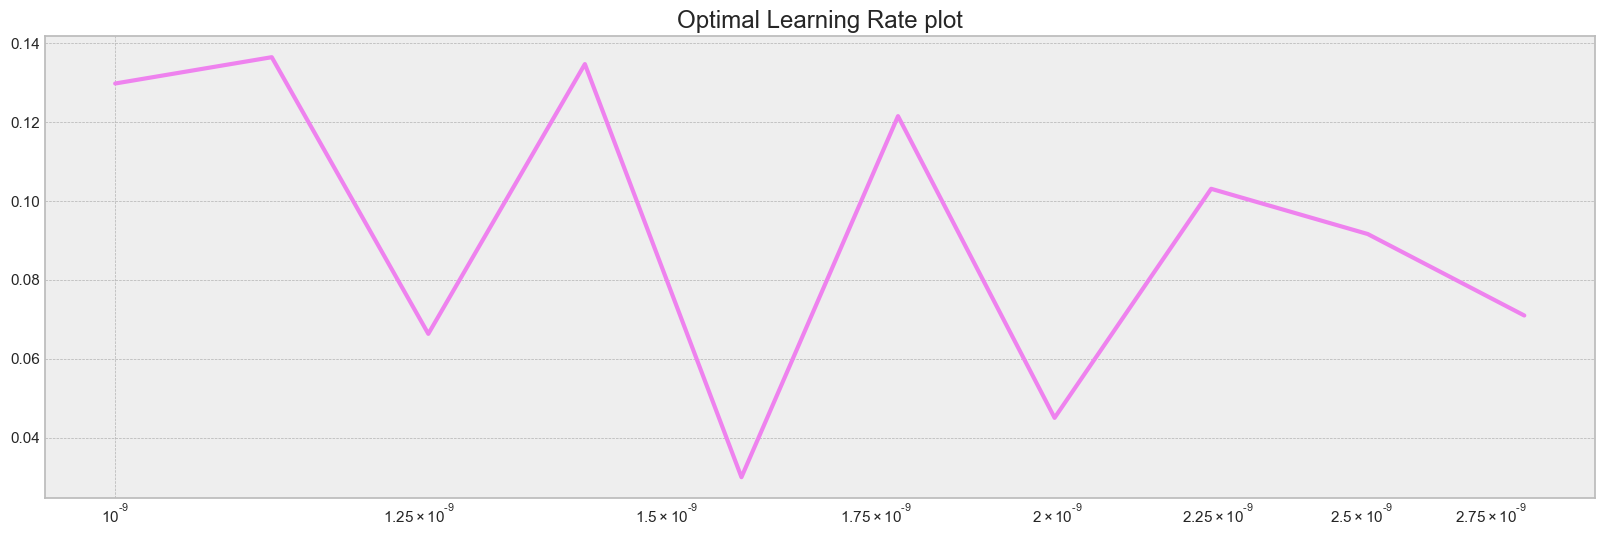

In [25]:
lr_(m,10)

* optimal learning rate based on the model will be less than 1e-6.

Epoch 1/20
1740/1743 [============================>.] - ETA: 0s - loss: 0.0189 - mse: 0.0378 - mae: 0.1372
Epoch 00001: mae improved from inf to 0.13708, saving model to C:/Users/Sethu/Downloads/save besgt\savebestonlymodel.h5
1743/1743 [==============================] - 21s 12ms/step - loss: 0.0188 - mse: 0.0377 - mae: 0.1371
Epoch 2/20
1740/1743 [============================>.] - ETA: 0s - loss: 0.0073 - mse: 0.0145 - mae: 0.0933
Epoch 00002: mae improved from 0.13708 to 0.09320, saving model to C:/Users/Sethu/Downloads/save besgt\savebestonlymodel.h5
1743/1743 [==============================] - 23s 13ms/step - loss: 0.0073 - mse: 0.0145 - mae: 0.0932
Epoch 3/20
1741/1743 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0106 - mae: 0.0801
Epoch 00003: mae improved from 0.09320 to 0.08002, saving model to C:/Users/Sethu/Downloads/save besgt\savebestonlymodel.h5
1743/1743 [==============================] - 20s 12ms/step - loss: 0.0053 - mse: 0.0106 - mae: 0.0800
Epoch

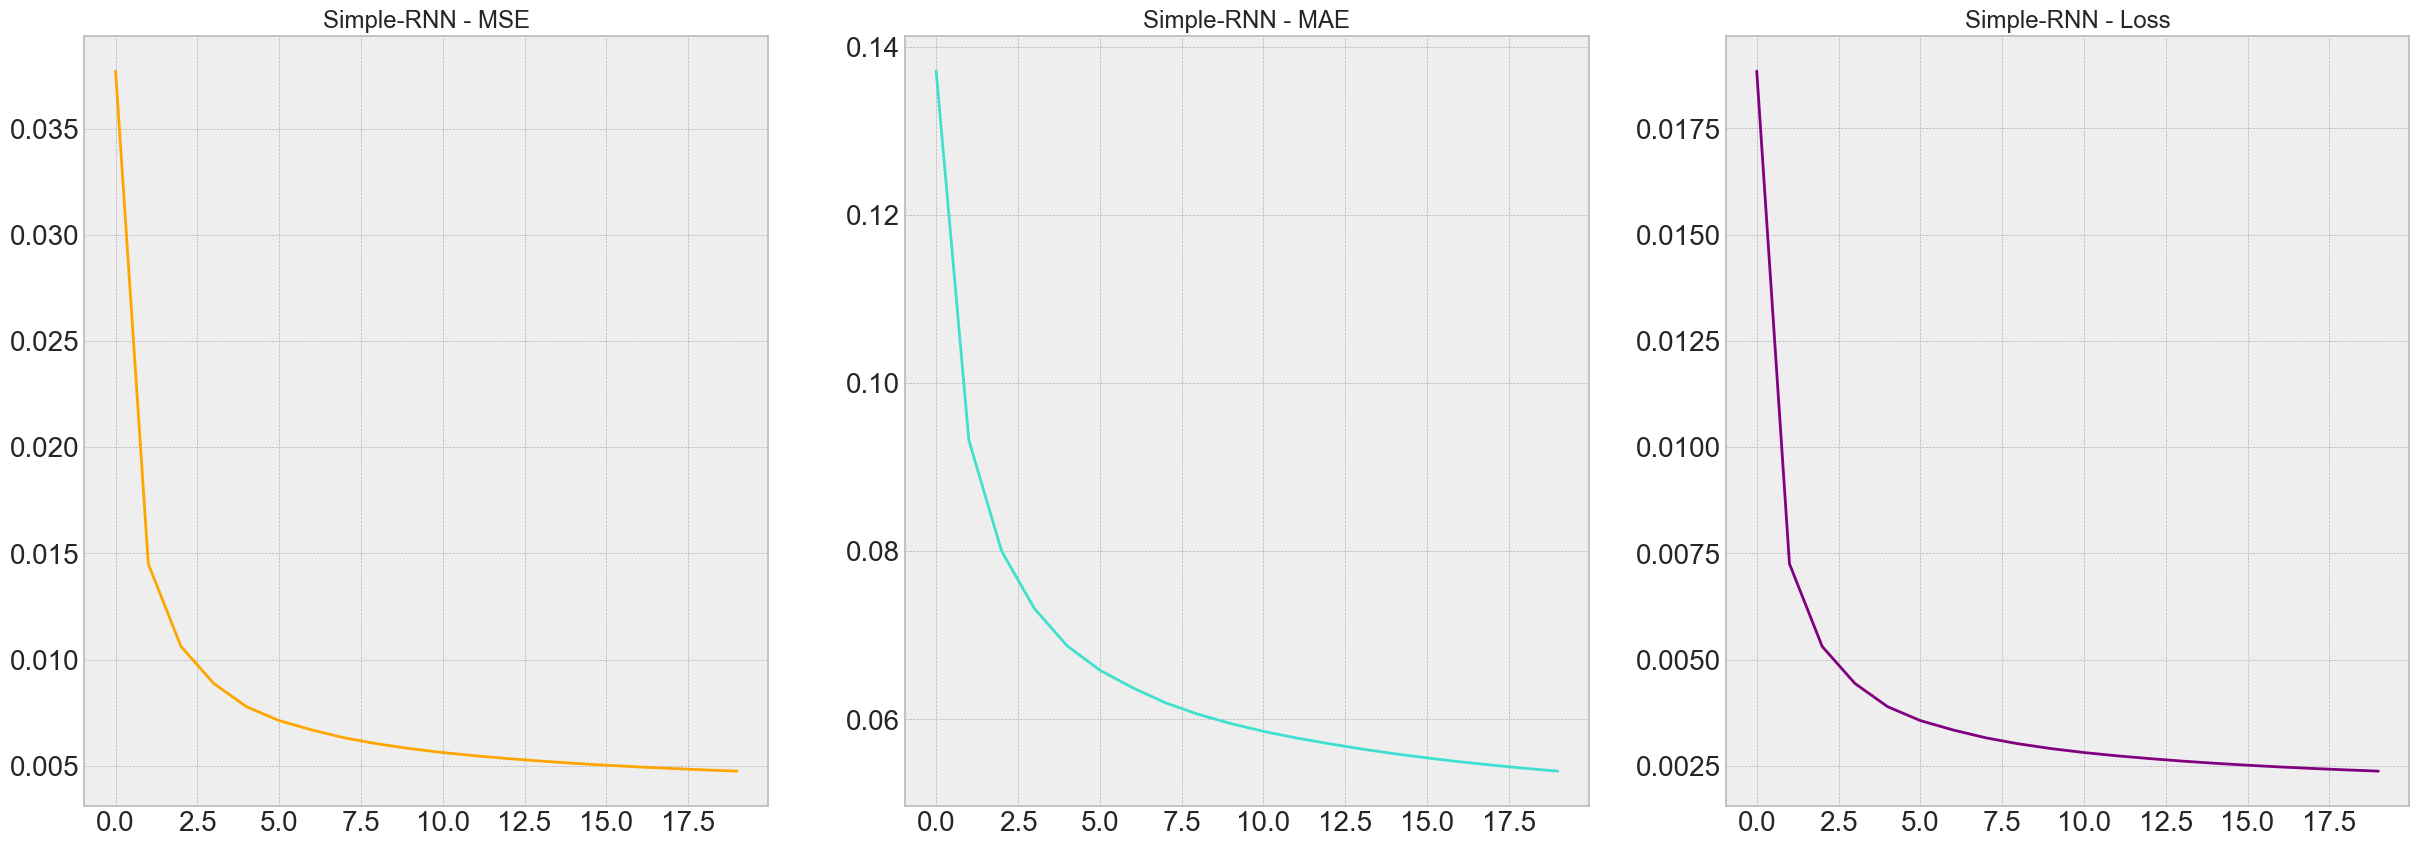

In [26]:
import os

directory = 'C:/Users/Sethu/Downloads/save besgt'
if not os.path.exists(directory):
    try:
        os.makedirs(directory)
    except PermissionError as e:
        print(f"Permission denied: {e}")
        directory = 'C:/Users/Public/Downloads/save besgt'
        if not os.path.exists(directory):
            os.makedirs(directory)
        print(f"Using alternative directory: {directory}")

# Update the file path in model_fits function
def model_fits(model, model_name, _lr_rate, epoch):
    opt = tf.keras.optimizers.Adam(learning_rate=_lr_rate, epsilon=1e-4)
    e_s = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=7, verbose=1, restore_best_weights=True, min_delta=0.0001)
    f = os.path.join(directory, 'savebestonlymodel.h5')
    mc = tf.keras.callbacks.ModelCheckpoint(filepath=f, monitor='mae', verbose=1, save_best_only=True)
    model.compile(optimizer=opt, loss=tf.keras.losses.Huber(), metrics=['mse', 'mae'])
    history = model.fit(xtrain_combined, y=[ytrain_nd, ytrain_tsd, ytrain_ewd], shuffle=False, use_multiprocessing=True,
                        batch_size=1, epochs=epoch, callbacks=[mc])
    print(f"Model: {model_name}")
    fig = plt.figure(figsize=(30, 10))
    plt.subplot(131)
    plt.plot(history.history['mse'], color='Orange')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.title(f'{model_name} - MSE')
    plt.subplot(132)
    plt.plot(history.history['mae'], color='turquoise')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.title(f'{model_name} - MAE')
    plt.subplot(133)
    plt.plot(history.history['loss'], color='purple')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.title(f'{model_name} - Loss')
    saved_model = model.save(f)
    return history, model

d, simplernn = model_fits(m, 'Simple-RNN', 1e-6, 20)


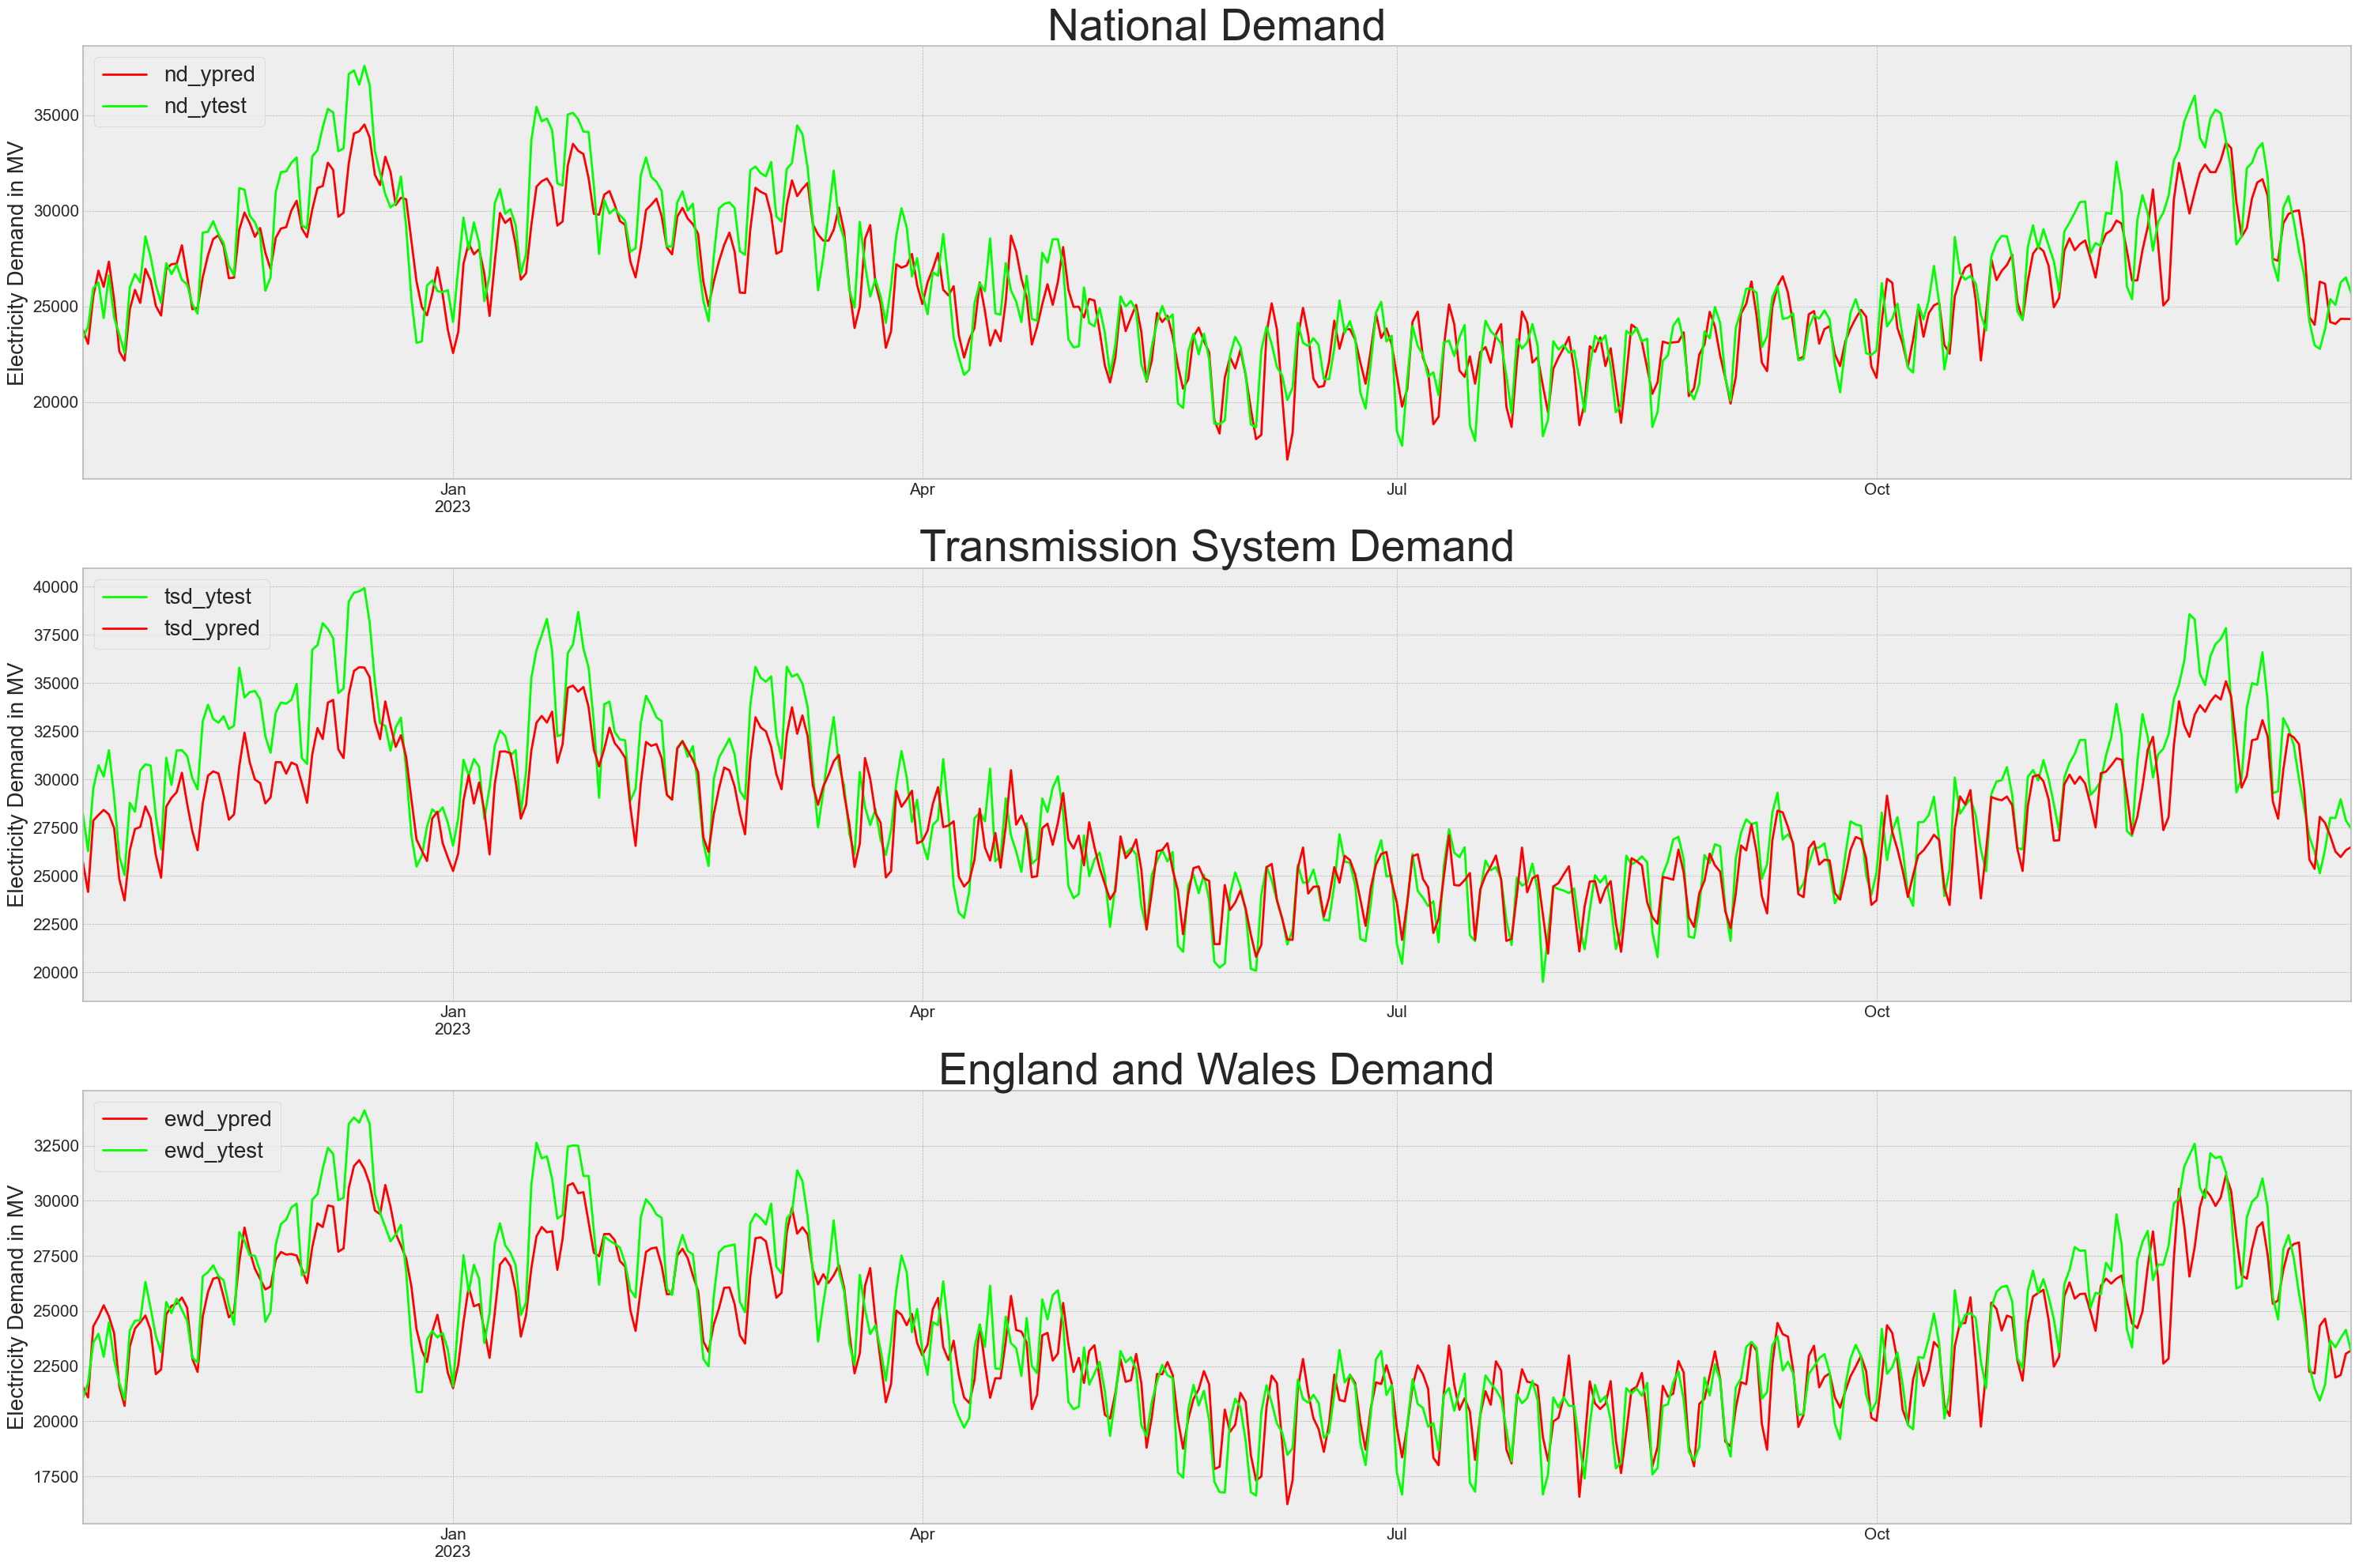

In [27]:
c,mt=predict_withplot(simplernn,xtest_combined)

In [28]:
mt

National Demand  Transmission System Demand  \
Mean Squared Error                    3104885.0                   3931919.0   
Squared Root (mse)                       1762.0                      1983.0   
Mean Absolute Error                      1406.0                      1567.0   
Mean Absolute Percentage Error              0.0                         0.0   

                                England and Wales Demand  
Mean Squared Error                             2429149.0  
Squared Root (mse)                                1559.0  
Mean Absolute Error                               1230.0  
Mean Absolute Percentage Error                       0.0

In [29]:
rnnforecast=forecasts(simplernn,366)

Before: (366, 1, 3)
After mean: (366, 3)


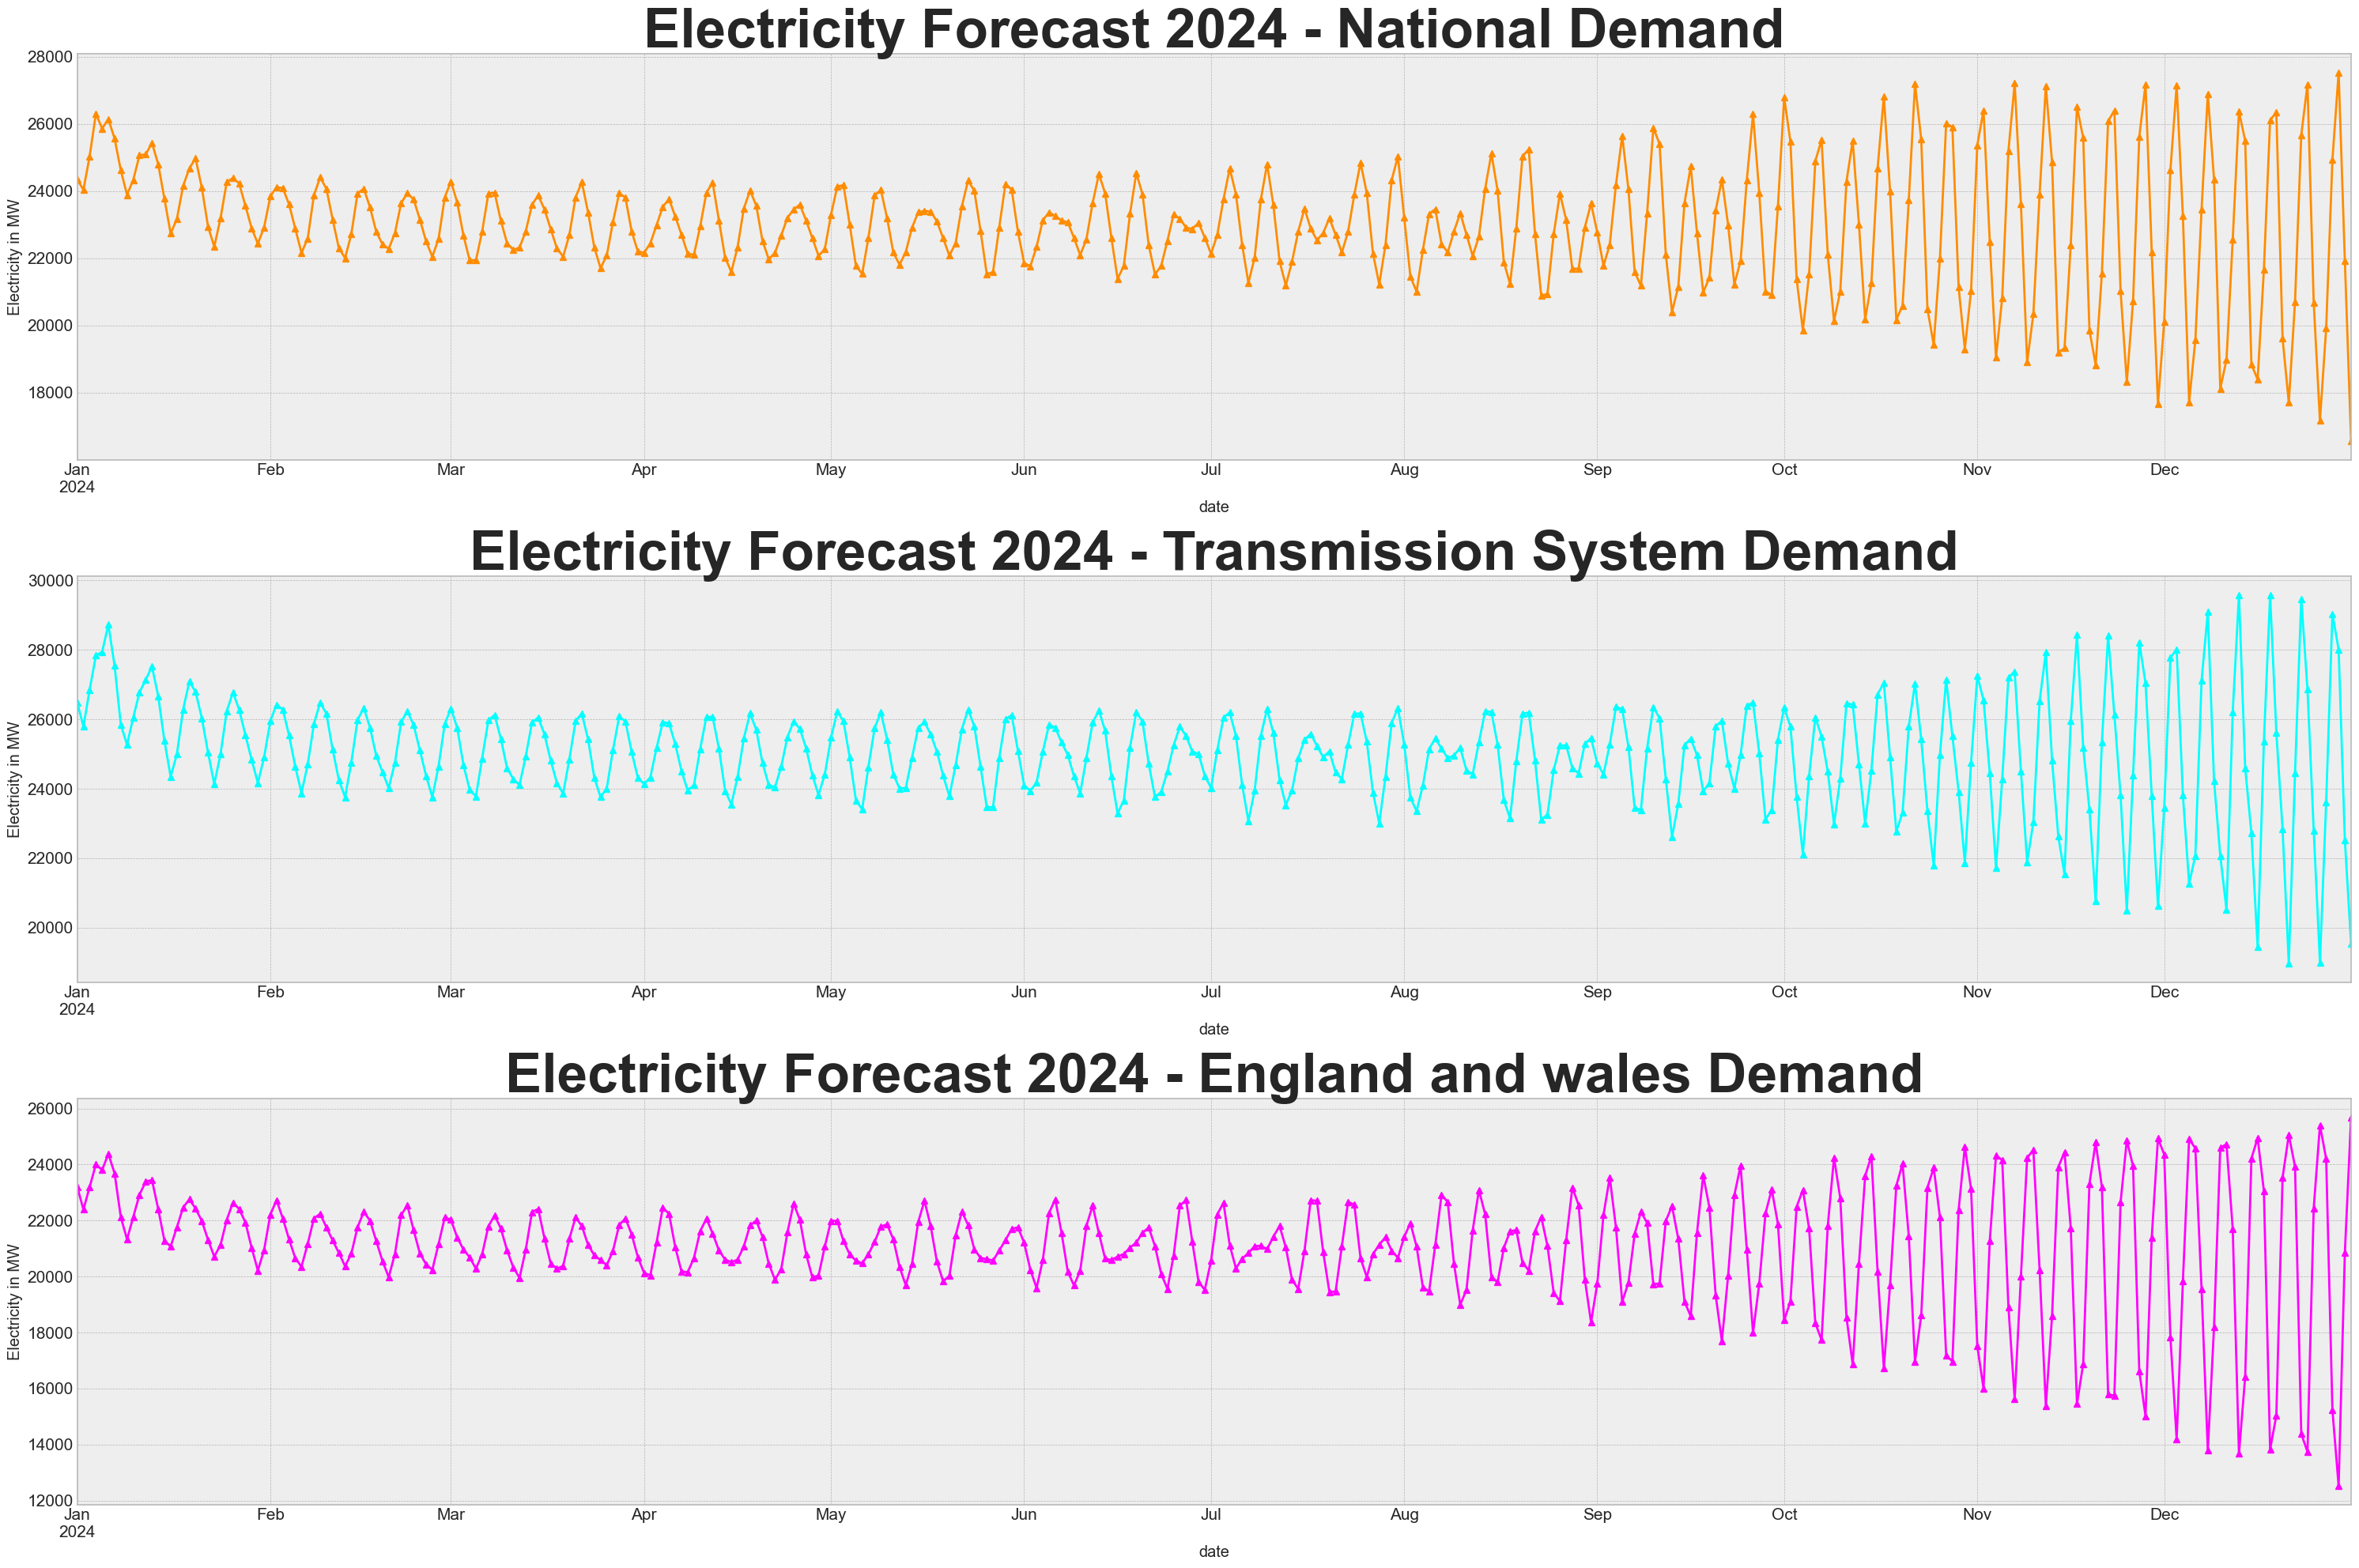

RNN Train RMSE: 0.08671582655572738
RNN Train MAE: 0.06711818386795923
RNN Train MAPE: 197965469765.47925
RNN Test RMSE: 0.07749771020338386
RNN Test MAE: 0.06181809494142436
RNN Test MAPE: 0.24893910572956704


In [35]:
f_2024(rnnforecast)
# Calculate Train RMSE, MAE, MAPE for RNN model
train_rmse_rnn = np.sqrt(mse(ytrain_nd, simplernn.predict(xtrain_combined)[:, 0]))
train_mae_rnn = mae(ytrain_nd, simplernn.predict(xtrain_combined)[:, 0])
train_mape_rnn = mape(ytrain_nd, simplernn.predict(xtrain_combined)[:, 0])

# Calculate Test RMSE, MAE, MAPE for RNN model
test_rmse_rnn = np.sqrt(mse(ytest_nd, simplernn.predict(xtest_combined)[:, 0]))
test_mae_rnn = mae(ytest_nd, simplernn.predict(xtest_combined)[:, 0])
test_mape_rnn = mape(ytest_nd, simplernn.predict(xtest_combined)[:, 0])

print(f"RNN Train RMSE: {train_rmse_rnn}")
print(f"RNN Train MAE: {train_mae_rnn}")
print(f"RNN Train MAPE: {train_mape_rnn}")
print(f"RNN Test RMSE: {test_rmse_rnn}")
print(f"RNN Test MAE: {test_mae_rnn}")
print(f"RNN Test MAPE: {test_mape_rnn}")


# LSTM

    * Long Short-Term Memory (LSTM) is one of the (RNN) architectures designed to address the vanishing gradient problem in traditional RNNs. 
    * This architecture is  particularly useful in tasks where sequences and dependencies play a crucial role, such as natural language processing, speech recognition, and time series analysis. And its gates are,

    * Forget Gate:

        Purpose: Determines what information from the cell state should be discarded or kept.
        Activation: Sigmoid function.
    
    * Input Gate:

        Purpose: Determines what new information to store in the cell state.
        Activation: Sigmoid function.
        
    * Cell State Update:

        Purpose: Updates the cell state with new information.
        Activation: Tanh function.
        
    * Output Gate:

        Purpose: Determines the next hidden state and also the output of the cell.
        Activation: Sigmoid function.

In [31]:

from tensorflow.keras.utils import plot_model

# Define the LSTM model
ls = Sequential([
    LSTM(units=80, return_sequences=True, activation='relu', 
         input_shape=(xtrain_combined.shape[1], xtrain_combined.shape[2]), name='lstm1'),
    
    LSTM(units=60, return_sequences=True, name='lstm2', activation='relu'),
    
    LSTM(units=60, return_sequences=True, name='lstm3', activation='relu'),
    
    LSTM(units=60, return_sequences=True, name='lstm4', activation='relu'),
    
    LSTM(units=60, return_sequences=False, name='lstm5', activation='relu'),
  
    Dense(units=184, activation='relu'),
    
    Dense(units=162, activation='relu'),
    
    Dense(units=127, activation='relu'),
    
    Dense(units=56, activation='relu',),
    
    Dense(units=36, activation='relu'),
    
    Dense(units=27, activation='relu'), 
    
    Dense(units=9, activation='relu'), 
    
    Dense(units=6, activation='relu'),
    
    Dense(units=num_features, activation='linear', name=f'Final_layer_with_{num_features}_output')
])



Epoch 1/10
200/200 [==============================] - 8s 41ms/step - loss: 0.1792
Epoch 2/10
200/200 [==============================] - 9s 47ms/step - loss: 0.1908
Epoch 3/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0999
Epoch 4/10
200/200 [==============================] - 8s 41ms/step - loss: 0.1918
Epoch 5/10
200/200 [==============================] - 9s 46ms/step - loss: 0.0431
Epoch 6/10
200/200 [==============================] - 9s 43ms/step - loss: 0.1760
Epoch 7/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0751
Epoch 8/10
200/200 [==============================] - 8s 41ms/step - loss: 0.1490
Epoch 9/10
200/200 [==============================] - 8s 39ms/step - loss: 0.1210
Epoch 10/10
200/200 [==============================] - 9s 43ms/step - loss: 0.1092


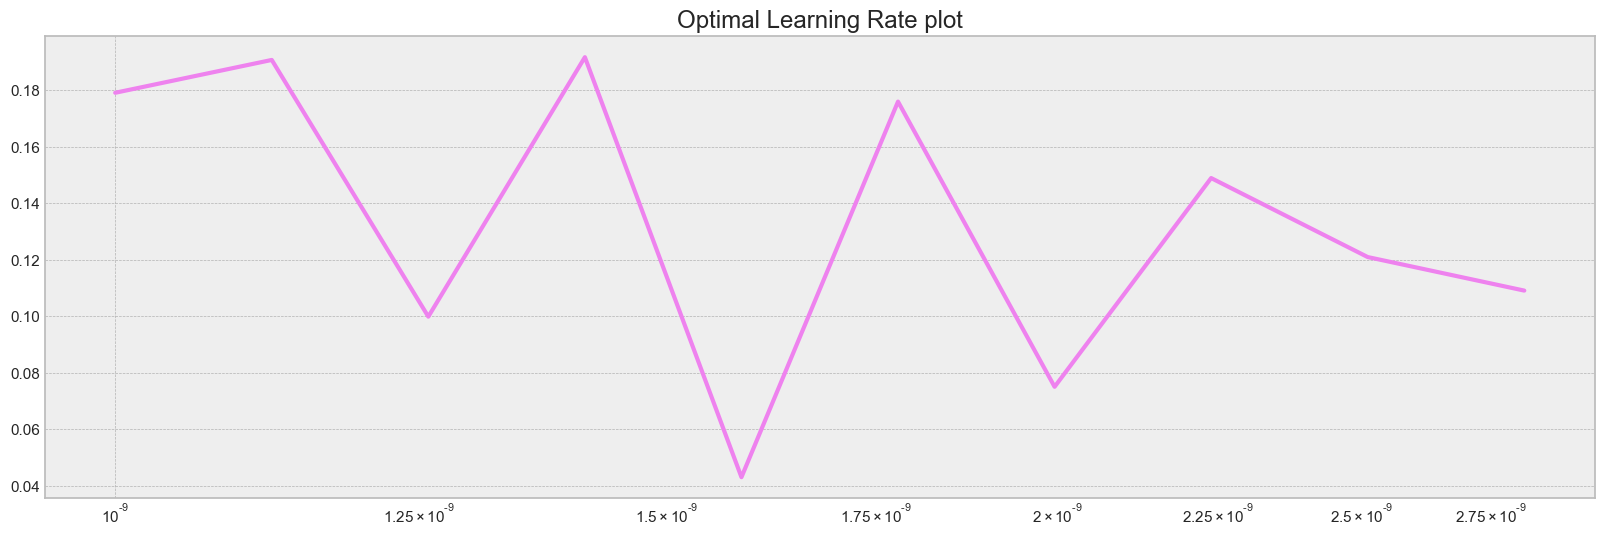

In [32]:
lr_(ls,10)

* optimal learning rate based on the model will be less than 1e-4.

Epoch 1/20
1742/1743 [============================>.] - ETA: 0s - loss: 0.0116 - mse: 0.0233 - mae: 0.1184
Epoch 00001: mae improved from inf to 0.11841, saving model to C:/Users/Sethu/Downloads/save besgt\savebestonlymodel.h5
1743/1743 [==============================] - 69s 40ms/step - loss: 0.0116 - mse: 0.0233 - mae: 0.1184
Epoch 2/20
1743/1743 [==============================] - ETA: 0s - loss: 0.0120 - mse: 0.0241 - mae: 0.1198
Epoch 00002: mae did not improve from 0.11841
1743/1743 [==============================] - 74s 43ms/step - loss: 0.0120 - mse: 0.0241 - mae: 0.1198
Epoch 3/20
1742/1743 [============================>.] - ETA: 0s - loss: 0.0129 - mse: 0.0258 - mae: 0.1241
Epoch 00003: mae did not improve from 0.11841
1743/1743 [==============================] - 71s 41ms/step - loss: 0.0129 - mse: 0.0258 - mae: 0.1241
Epoch 4/20
1743/1743 [==============================] - ETA: 0s - loss: 0.0136 - mse: 0.0272 - mae: 0.1277
Epoch 00004: mae did not improve from 0.11841
1743/174

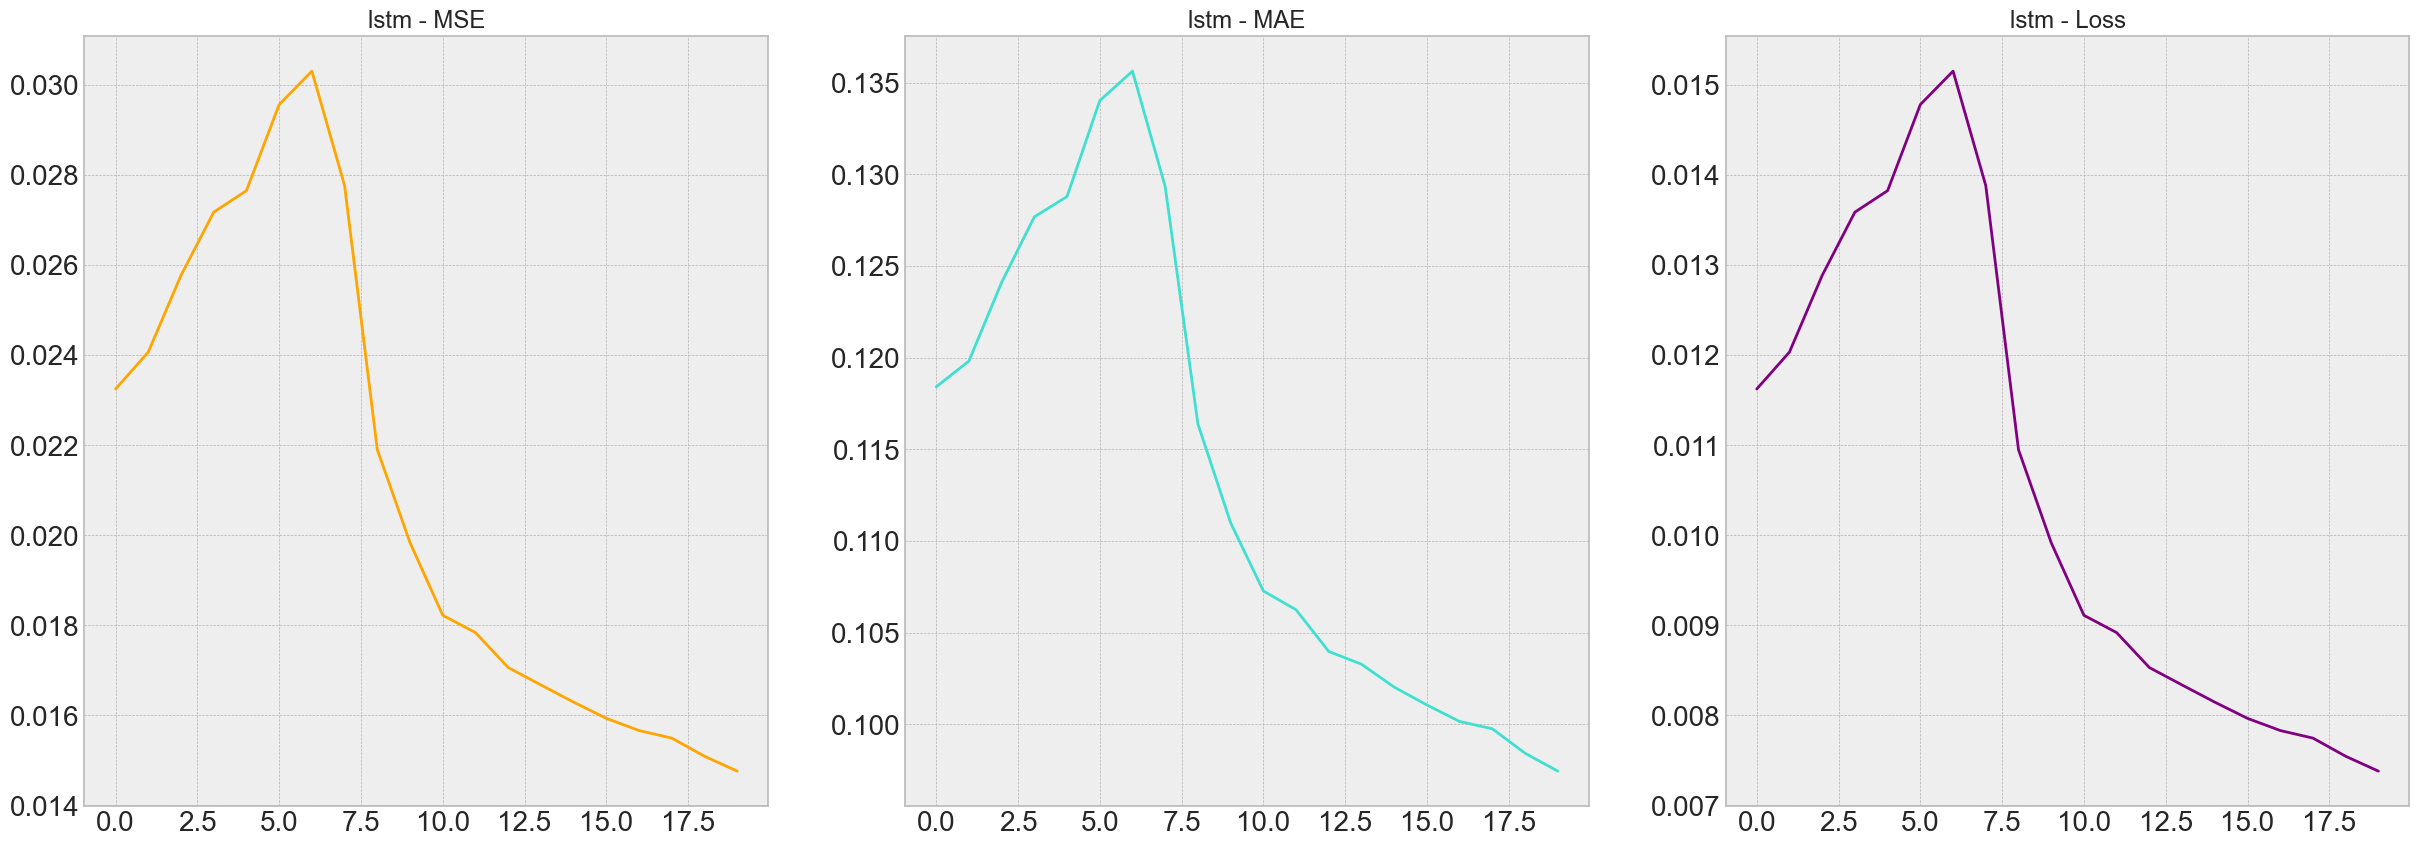

In [36]:
lshistory,ls=model_fits(ls,'lstm',1e-4,20) 

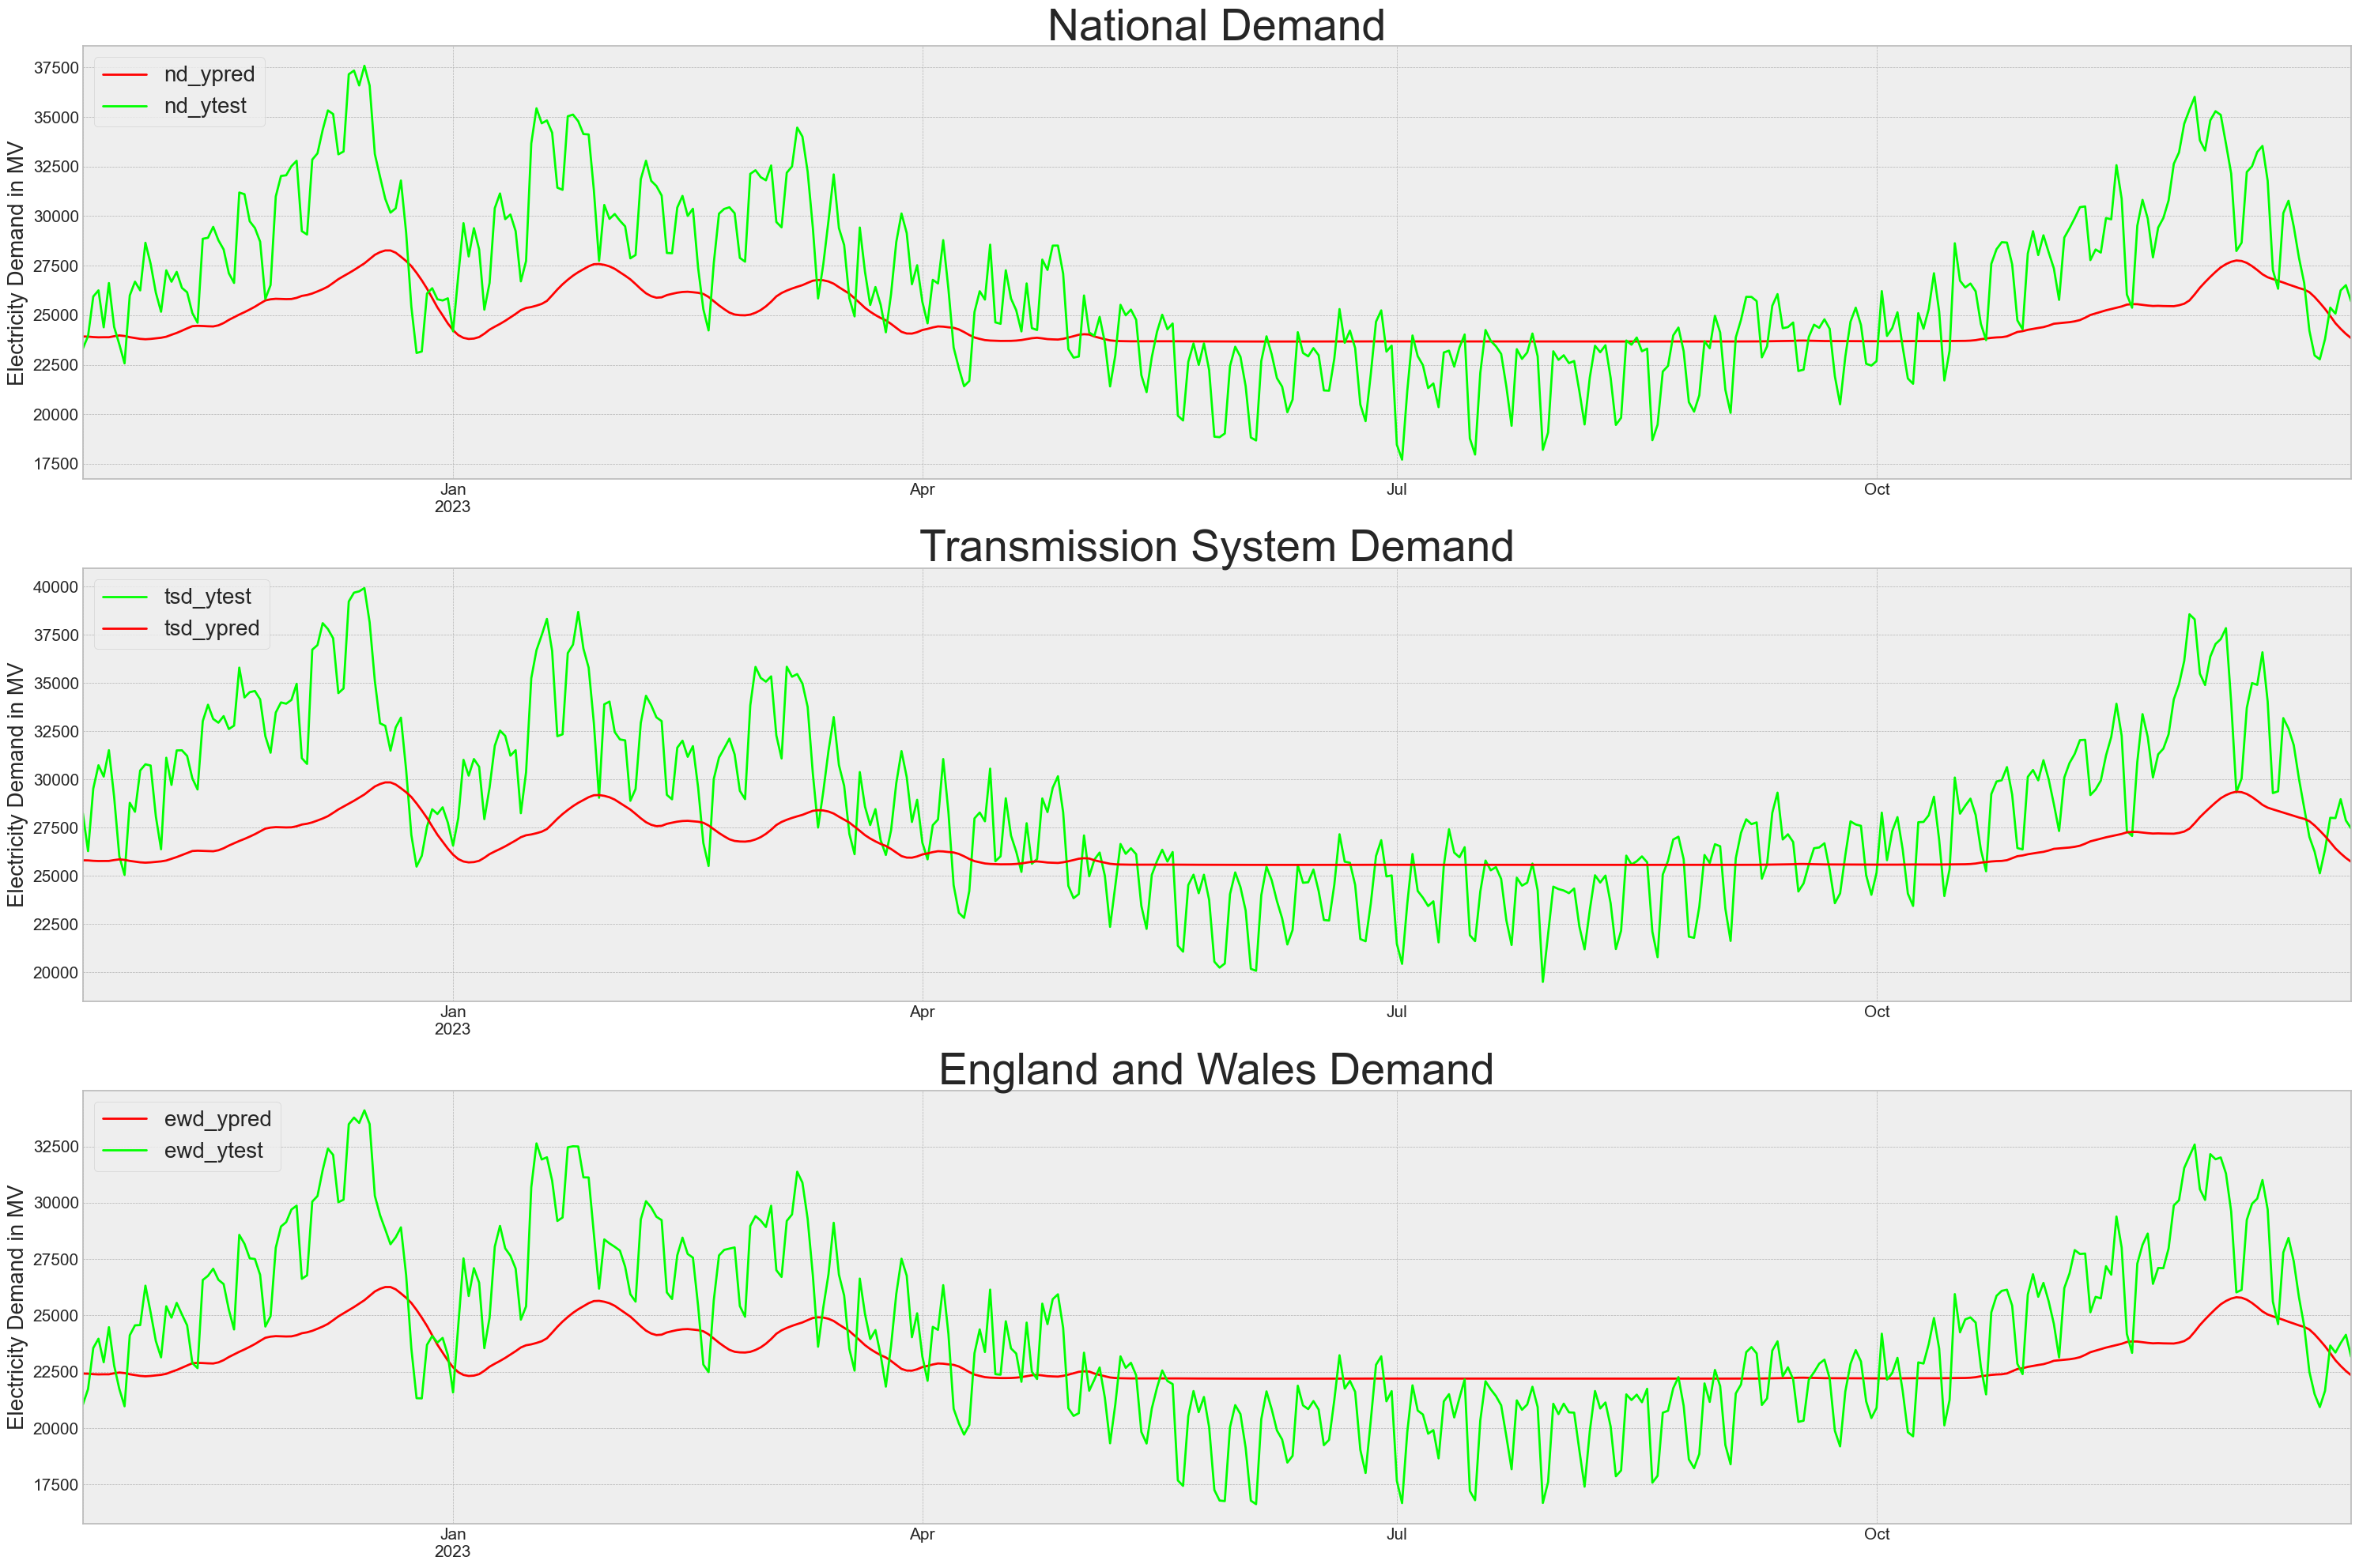

In [44]:
ls=tf.keras.models.load_model("C:/Users/Sethu/Downloads/save besgt/savebestonlymodel.h5")
lsframe,ls_metrics=predict_withplot(ls,xtest_combined) 

In [38]:
ls_metrics

National Demand  Transmission System Demand  \
Mean Squared Error                   14253697.0                  17032821.0   
Squared Root (mse)                       3775.0                      4127.0   
Mean Absolute Error                      2928.0                      3215.0   
Mean Absolute Percentage Error              0.0                         0.0   

                                England and Wales Demand  
Mean Squared Error                            10919022.0  
Squared Root (mse)                                3304.0  
Mean Absolute Error                               2615.0  
Mean Absolute Percentage Error                       0.0

In [40]:
lstmforecast=forecasts(ls,366)

Before: (366, 1, 3)
After mean: (366, 3)


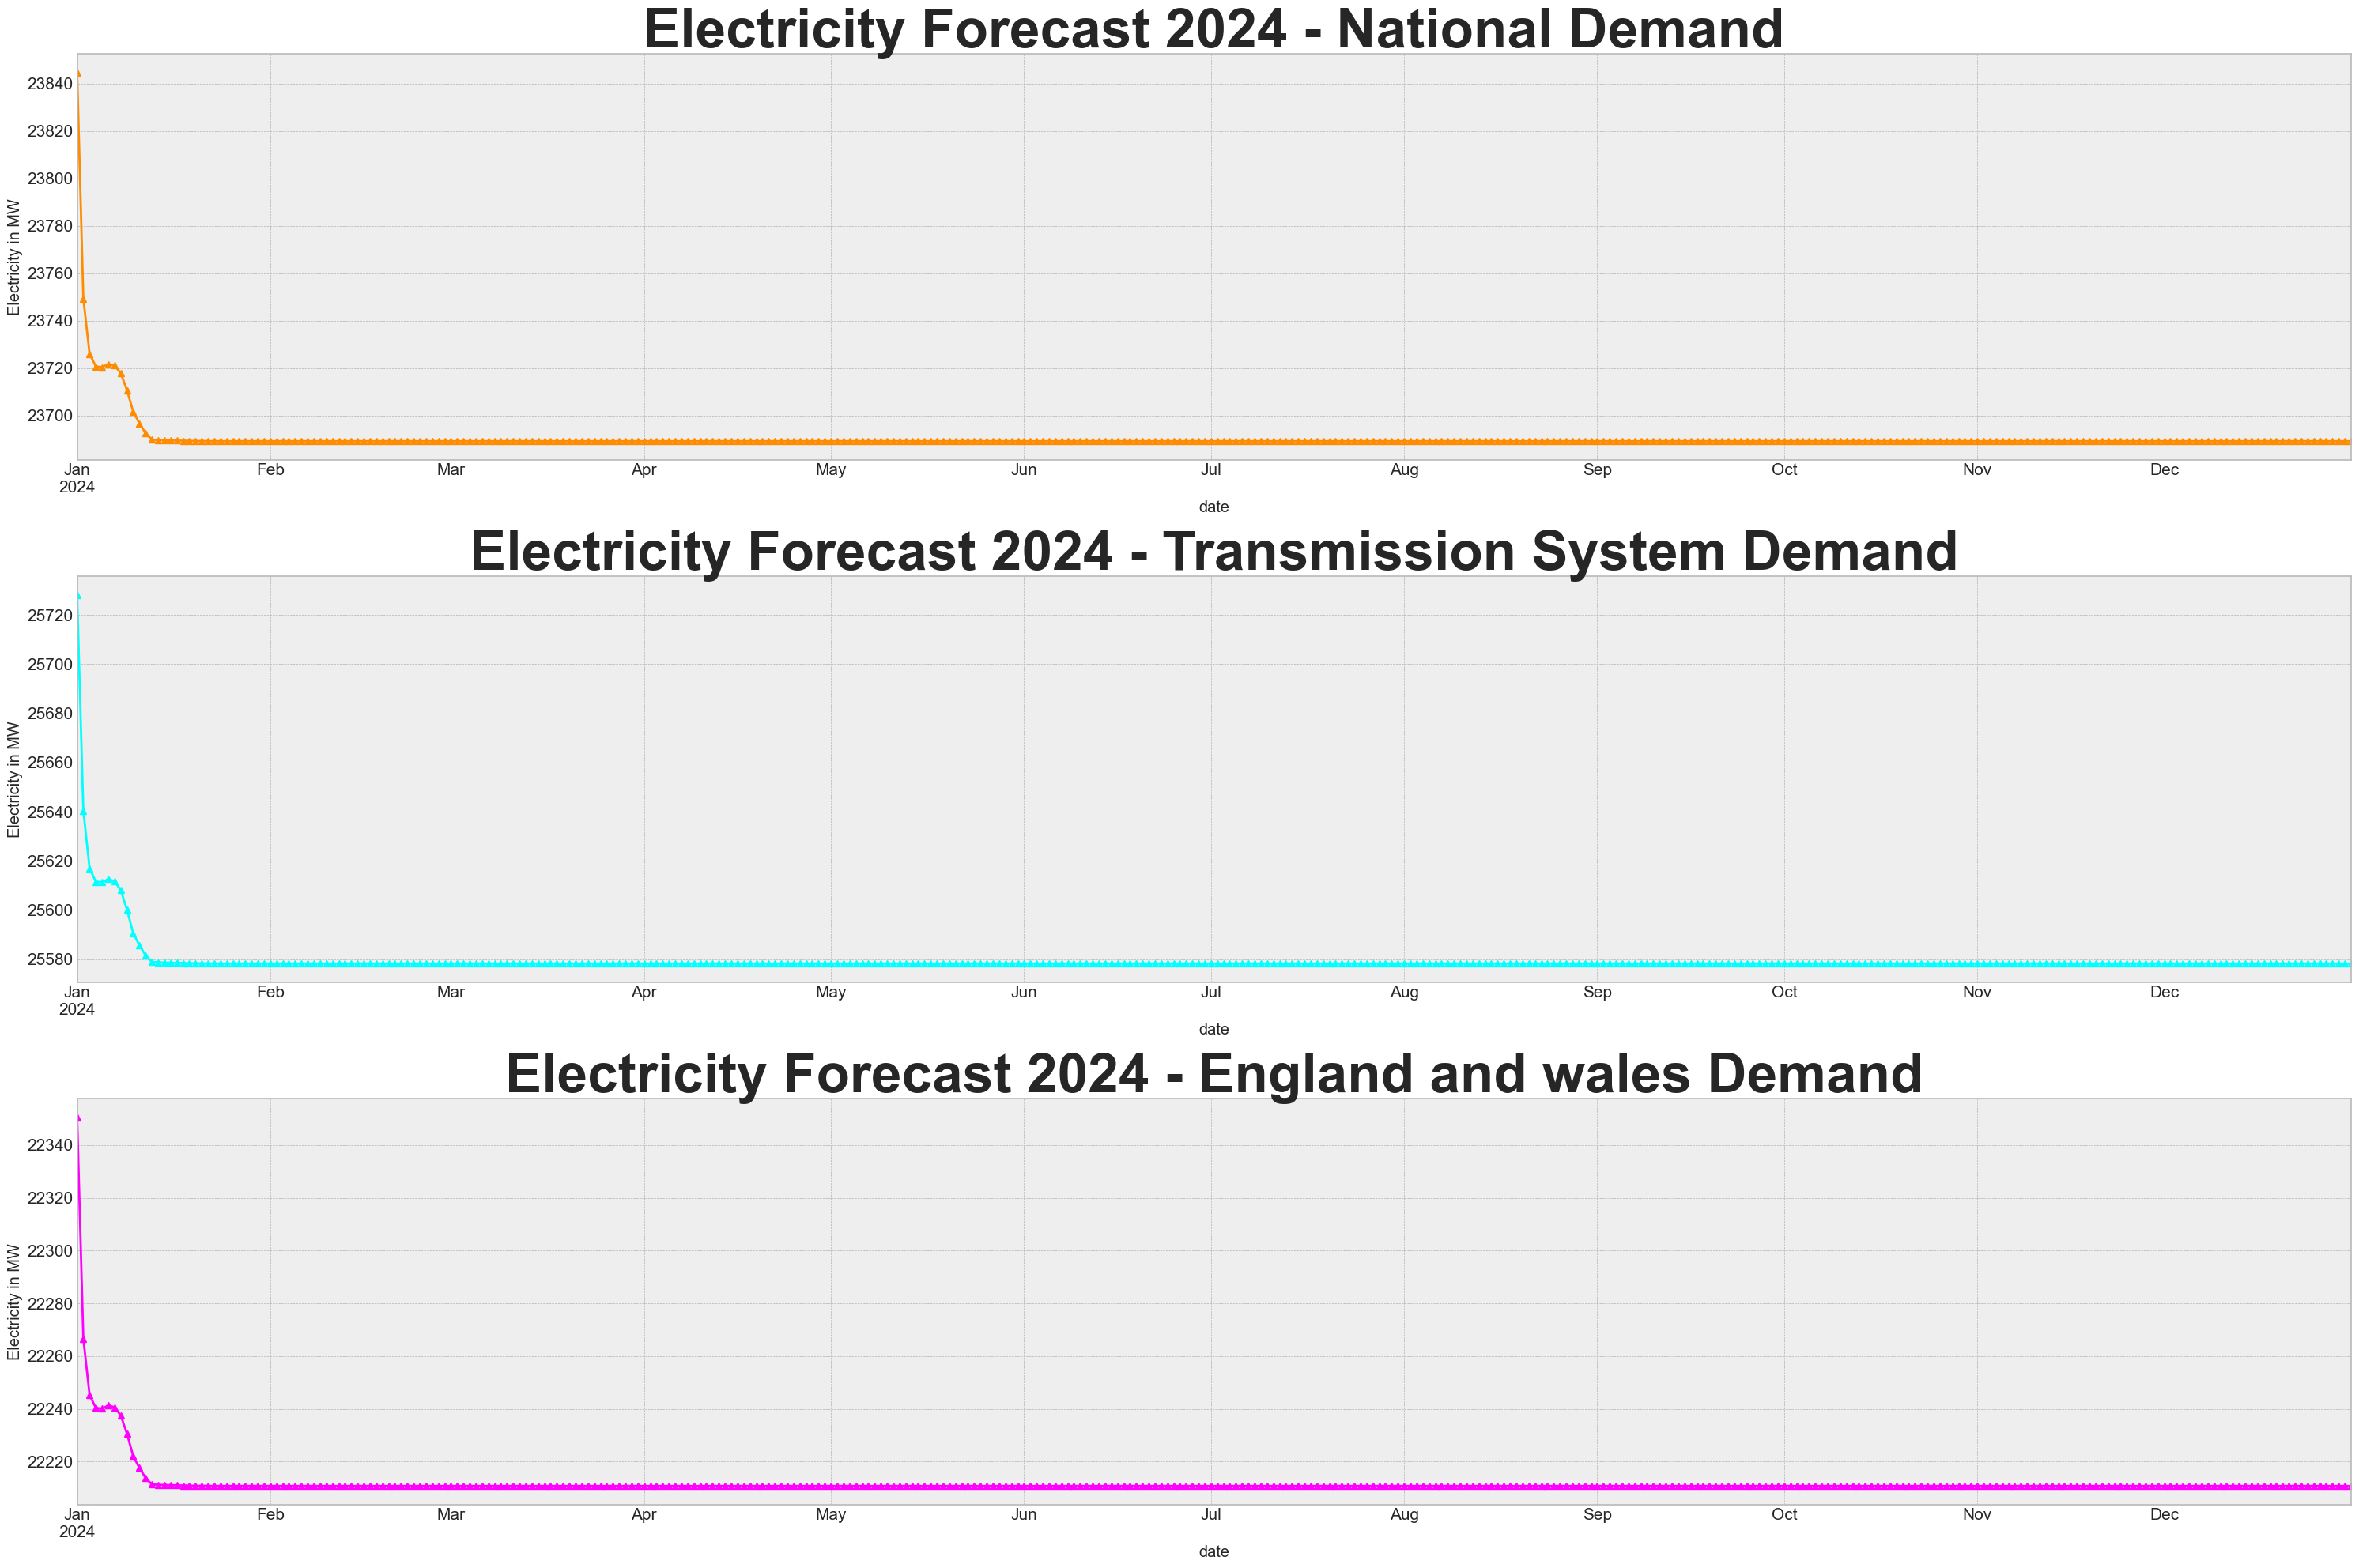

LSTM Train RMSE: 0.19806273043314726
LSTM Train MAE: 0.16062626292981635
LSTM Train MAPE: 695508797121.93
LSTM Test RMSE: 0.1660465403633062
LSTM Test MAE: 0.12877248488464488
LSTM Test MAPE: 0.5337729477855704


In [42]:
f_2024(lstmforecast)


# Calculate Train RMSE, MAE, MAPE for LSTM model
train_rmse_lstm = np.sqrt(mse(ytrain_nd, ls.predict(xtrain_combined)[:, 0]))
train_mae_lstm = mae(ytrain_nd, ls.predict(xtrain_combined)[:, 0])
train_mape_lstm = mape(ytrain_nd, ls.predict(xtrain_combined)[:, 0])

# Calculate Test RMSE, MAE, MAPE for LSTM model
test_rmse_lstm = np.sqrt(mse(ytest_nd, ls.predict(xtest_combined)[:, 0]))
test_mae_lstm = mae(ytest_nd, ls.predict(xtest_combined)[:, 0])
test_mape_lstm = mape(ytest_nd, ls.predict(xtest_combined)[:, 0])

print(f"LSTM Train RMSE: {train_rmse_lstm}")
print(f"LSTM Train MAE: {train_mae_lstm}")
print(f"LSTM Train MAPE: {train_mape_lstm}")
print(f"LSTM Test RMSE: {test_rmse_lstm}")
print(f"LSTM Test MAE: {test_mae_lstm}")
print(f"LSTM Test MAPE: {test_mape_lstm}")


